# *Data preparation & exploration*

# A. Problem statement

Given a dataset containing information of clients of a bank, the objectives are to find the most probable churners, to identify and to understand the main causes for leaving the bank.

The information about clients is in the columns with the following names:

Attrition_Flag,
Customer_Age,
Gender,
Dependent_count,
Education_Level,
Marital_Status,
Income_Category,
Card_Category,
Months_on_book,
Total_Relationship_Count,
Months_Inactive_12_mon,
Contacts_Count_12_mon,
Credit_Limit,
Total_Used_Bal,
Total_Unused_Bal,
Total_Amt_Chng_Q4_Q1,
Total_Trans_Amt,
Total_Trans_Ct,
Total_Ct_Chng_Q4_Q1,
Avg_Utilization_Ratio.

In order to achieve the objective, the following steps shall be taken: data preparation & exploration, model development & model explainability

# B. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import pickle
import shap

# C. Read dataset

In [2]:
path = "C:\\Users\\Valentin\\Desktop\\ASE\\AN 2\\AN 2 SEM 2\\Practica - BCR - TTJ\\TTJ project\\dataset\\dataset.csv"

data = pd.read_csv(path)

# D. Exploratory data analysis

## 1. General

a) Viewing the dimensions of the dataset

In [3]:
data.shape

(10127, 21)

The dataset has information about 21 aspects of 10127 clients

b) Preview of the data set

In [4]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40.0,F,4.0,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


That's how the information is organized

c) View column names

In [5]:
columns = data.columns
print(columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Used_Bal',
       'Total_Unused_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


Here are all the names of all the columns

d) View types of columns

In [6]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

e) View information about dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10124 non-null  float64
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10122 non-null  float64
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10125 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

The dateset has 6 categorical variables (dtype::object), and 15 numerical variables(dtype::int&float). Out of the 21 variables, 5 of them have missing values. 

f) View statistical properties of dataset

In [8]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10124.000000,10122.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.326057,2.345781,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.017889,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
data.describe(include = ['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,10125,10127
unique,2,2,6,3,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3560,9436


## 2. Univariate analysis

The target variable that needs to be analysed is ('Attrition_Flag')

a) Checking if target variable has missing values

In [10]:
data['Attrition_Flag'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Name: Attrition_Flag, Length: 10127, dtype: bool

In [11]:
data['Attrition_Flag'].isnull().sum()

0

Having 0 null values is neccesary

b) View unique values

In [12]:
data['Attrition_Flag'].nunique()

2

In [13]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

So, we have 2 unique values in the target variable, which values are 'Existing Customer' and 'Attrited Customer'

c) View frequency of values and percentage of frequency

In [14]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [15]:
data['Attrition_Flag'].value_counts() / len(data) * 100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Attrited Customer => ~16.07% of the customers have left the bank. Existing Customer => ~83.93% are still customers of the bank

d) Visualize frequency distribution of variable 'Attrition_Flag'

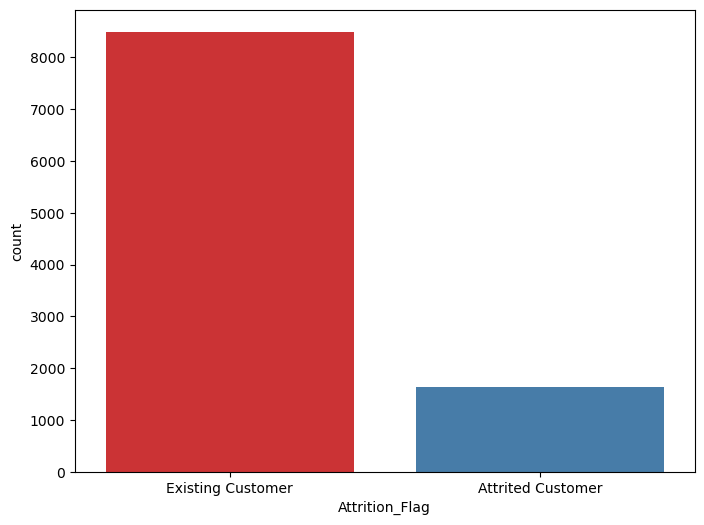

In [16]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot(data = data, x = 'Attrition_Flag', palette = 'Set1')
plt.show()

e) Chance labels of variable 'Loan Status' to numeric

In [17]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})

In [18]:
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

The categorical column 'Attrition_Flag' has been changed to a numerical column, so that we can analyse it. 8500 values of 0 mean current clients of the bank and 1627 values of 1 mean clients which left the bank.

## 3. Feature analysis

### 3.1 Categorical variables

a) Explore categorical variables

Finding the categorical variables left

In [19]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Gender                       object
Dependent_count             float64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Used_Bal                int64
Total_Unused_Bal            float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Selecting the categorical variables

In [20]:
categorical_columns = [col for col in data.columns if data[col].dtypes == 'object']

In [21]:
print('There are',len(categorical_columns),'categorical variables. These are',categorical_columns)

There are 5 categorical variables. These are ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [22]:
data[categorical_columns].head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,NaN,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


Check distribution of variable 'Gender'

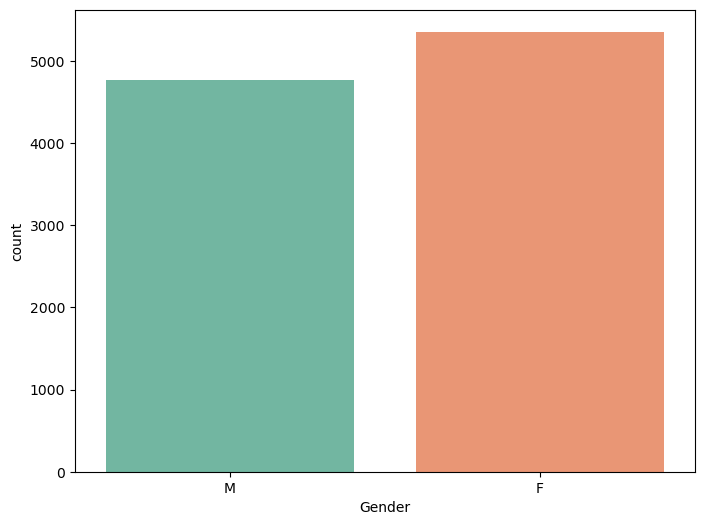

In [23]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Gender',palette = 'Set2')
plt.show()

Looks alright

Check distribution of variable 'Education_Level'

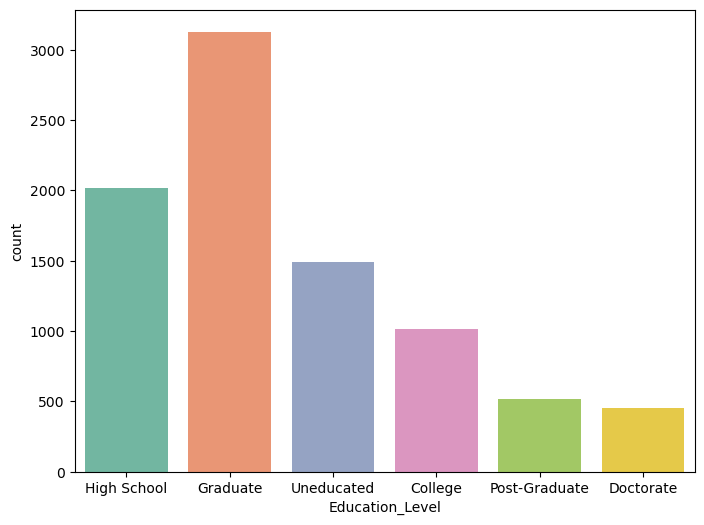

In [24]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Education_Level',palette = 'Set2')
plt.show()

Looks alright

Check distribution of variable 'Marital_Status'

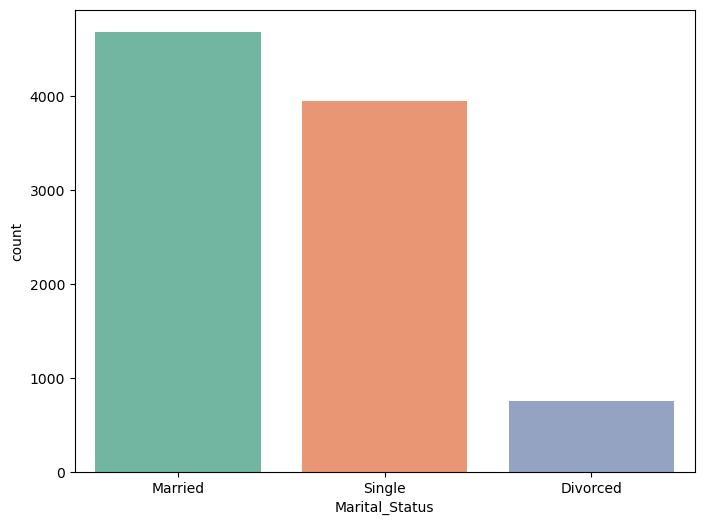

In [25]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Marital_Status',palette = 'Set2')
plt.show()

Looks alright

Check distribution of variable 'Income_Category'

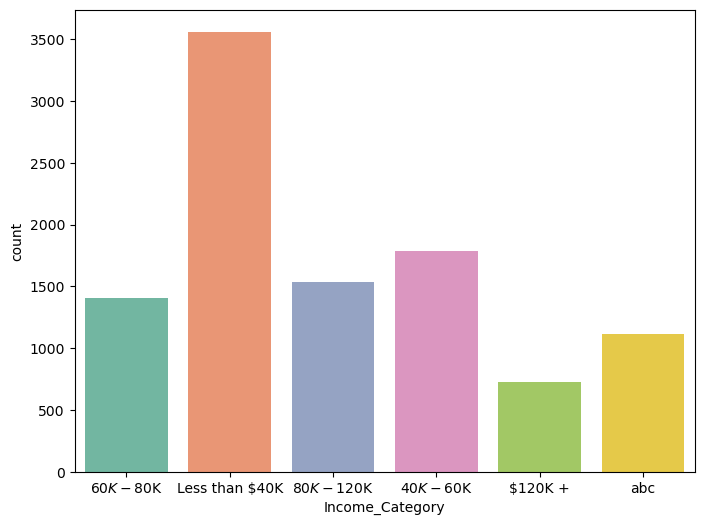

In [26]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Income_Category',palette = 'Set2')
plt.show()

Seems that we have unintelligible values in this column, more precisely, 'abc', which are in fact missing values. A special treatment will be made for missing values

Check distribution of variable 'Card_Category'

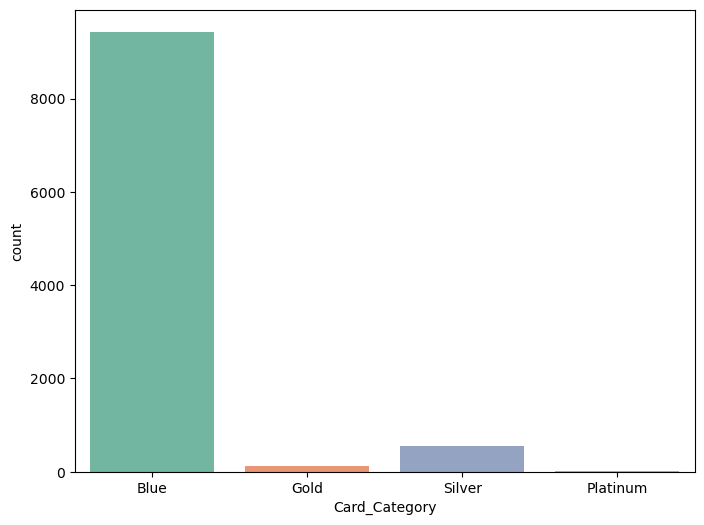

In [27]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Card_Category',palette = 'Set2')
plt.show()

Category 'Blue' is dominating the others, so we will make some modifications later

Check distribution of categorical variables in relationships with target 'Attrition_Flag'

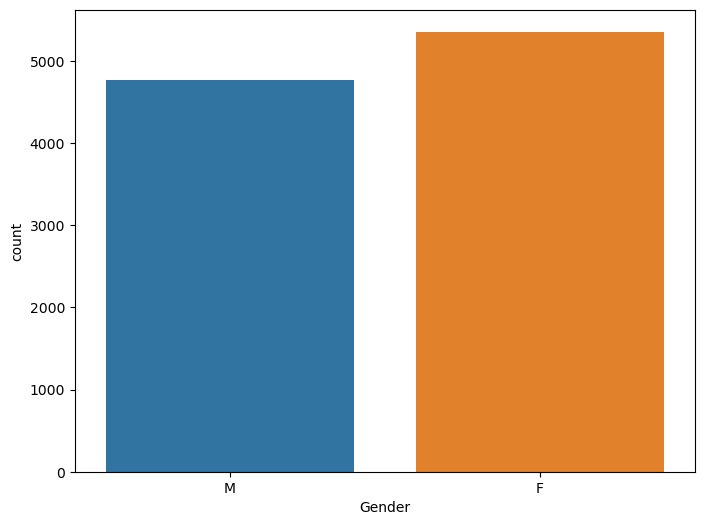

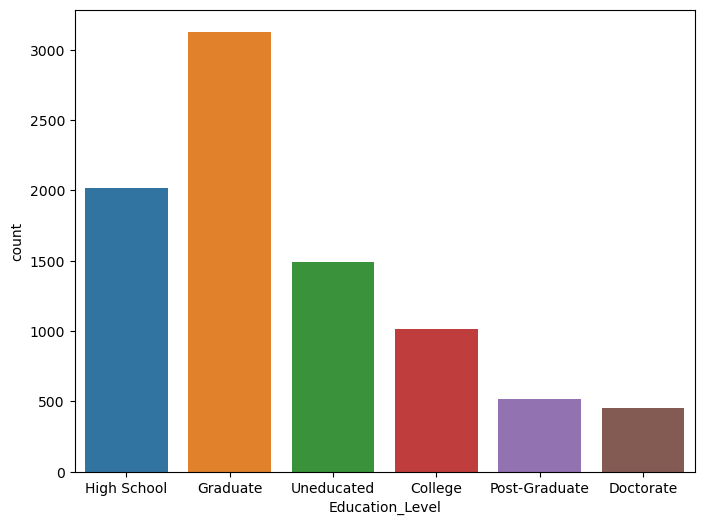

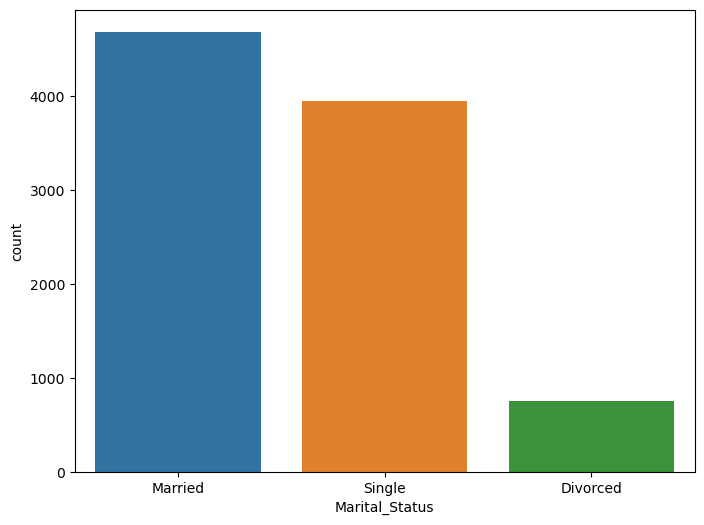

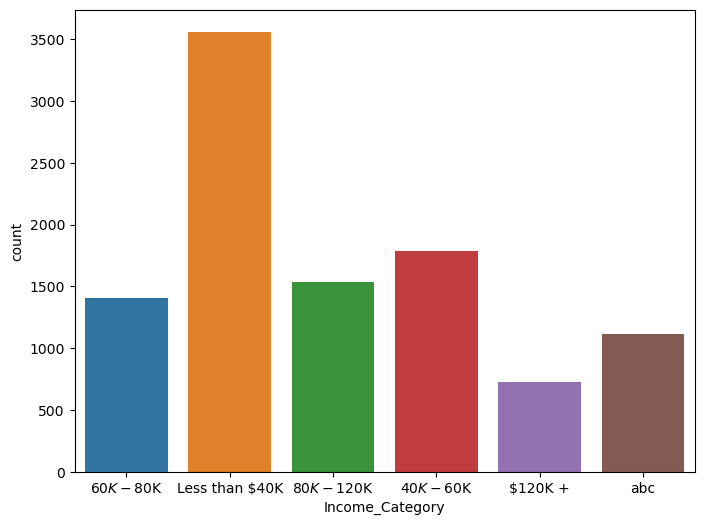

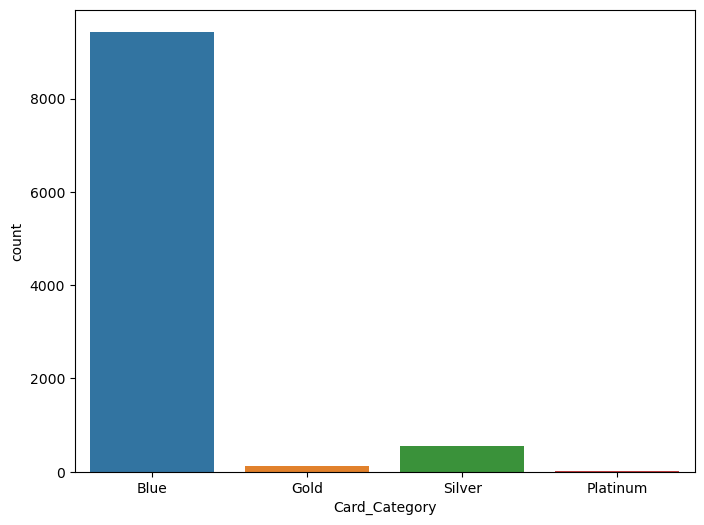

In [28]:
for col in categorical_columns:
    fig,ax = plt.subplots(figsize = (8,6))
    ax = sns.countplot(data = data, x = col)
    plt.show()

The average gender for the bank's clients is Female. Most of the bank's clients have graduate level of education, are married and earn less than 40K dollars / year. Almost all of the clients have a blue card.

Keeping in mind that Attrition_Flag == 1 means leaving the bank, and == 0 means being a client

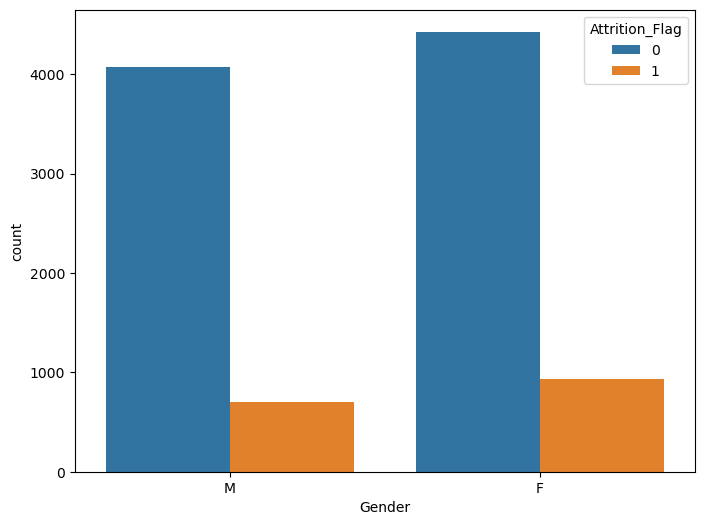

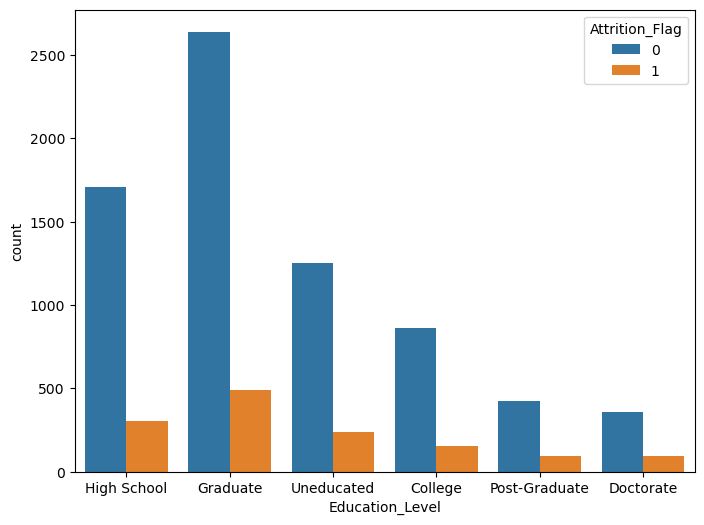

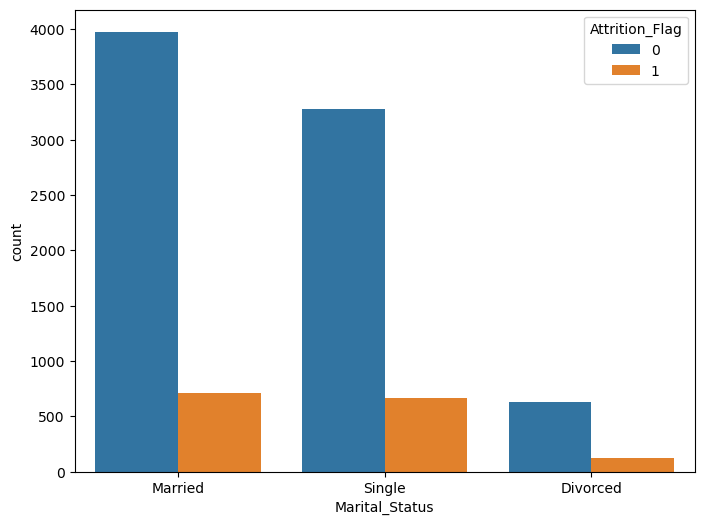

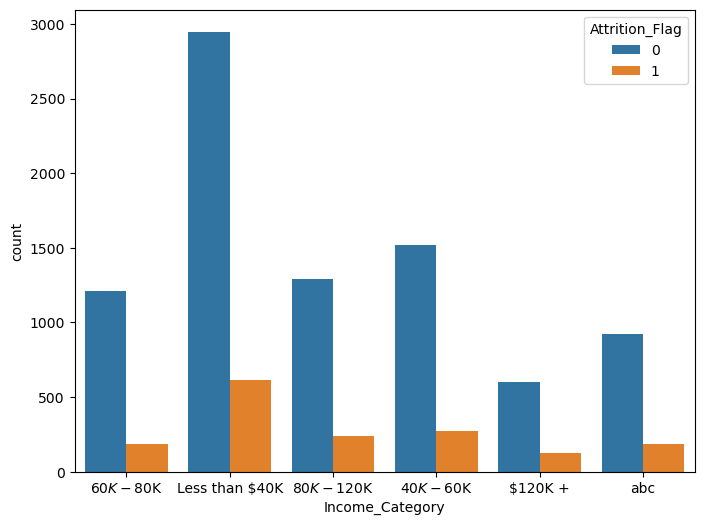

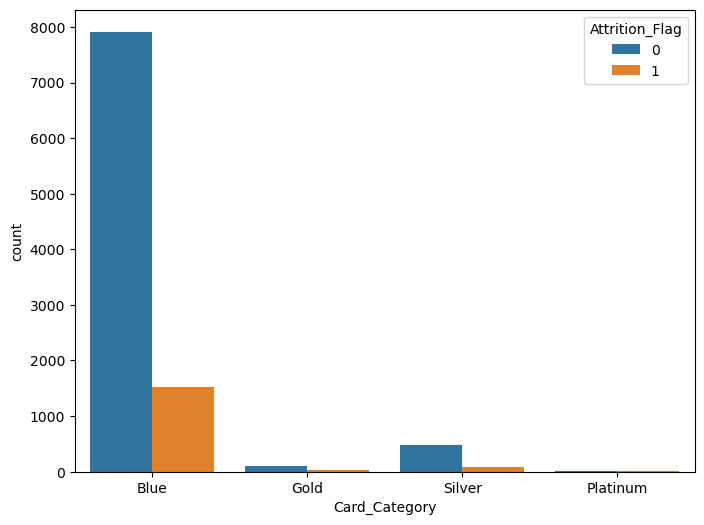

In [29]:
for col in categorical_columns:
    fig,ax = plt.subplots(figsize = (8,6))
    ax = sns.countplot(data = data, x = col, hue = 'Attrition_Flag')
    plt.show()

Visually it seems that the number of churners is distributed somewhat evenly on the categorical columns, but further analysis will be made. The numer of churners is in proportion with the total number of clients which fall in a subcategory. The only notable visual difference is in Marital_Status, where there are proportionally more single clients leaving the bank than married clients.

b) Missing values imputation

In [30]:
#Check what categorical variables has missing values
data[categorical_columns].isnull().sum()

Gender                0
Education_Level    1519
Marital_Status      749
Income_Category       2
Card_Category         0
dtype: int64

<AxesSubplot:>

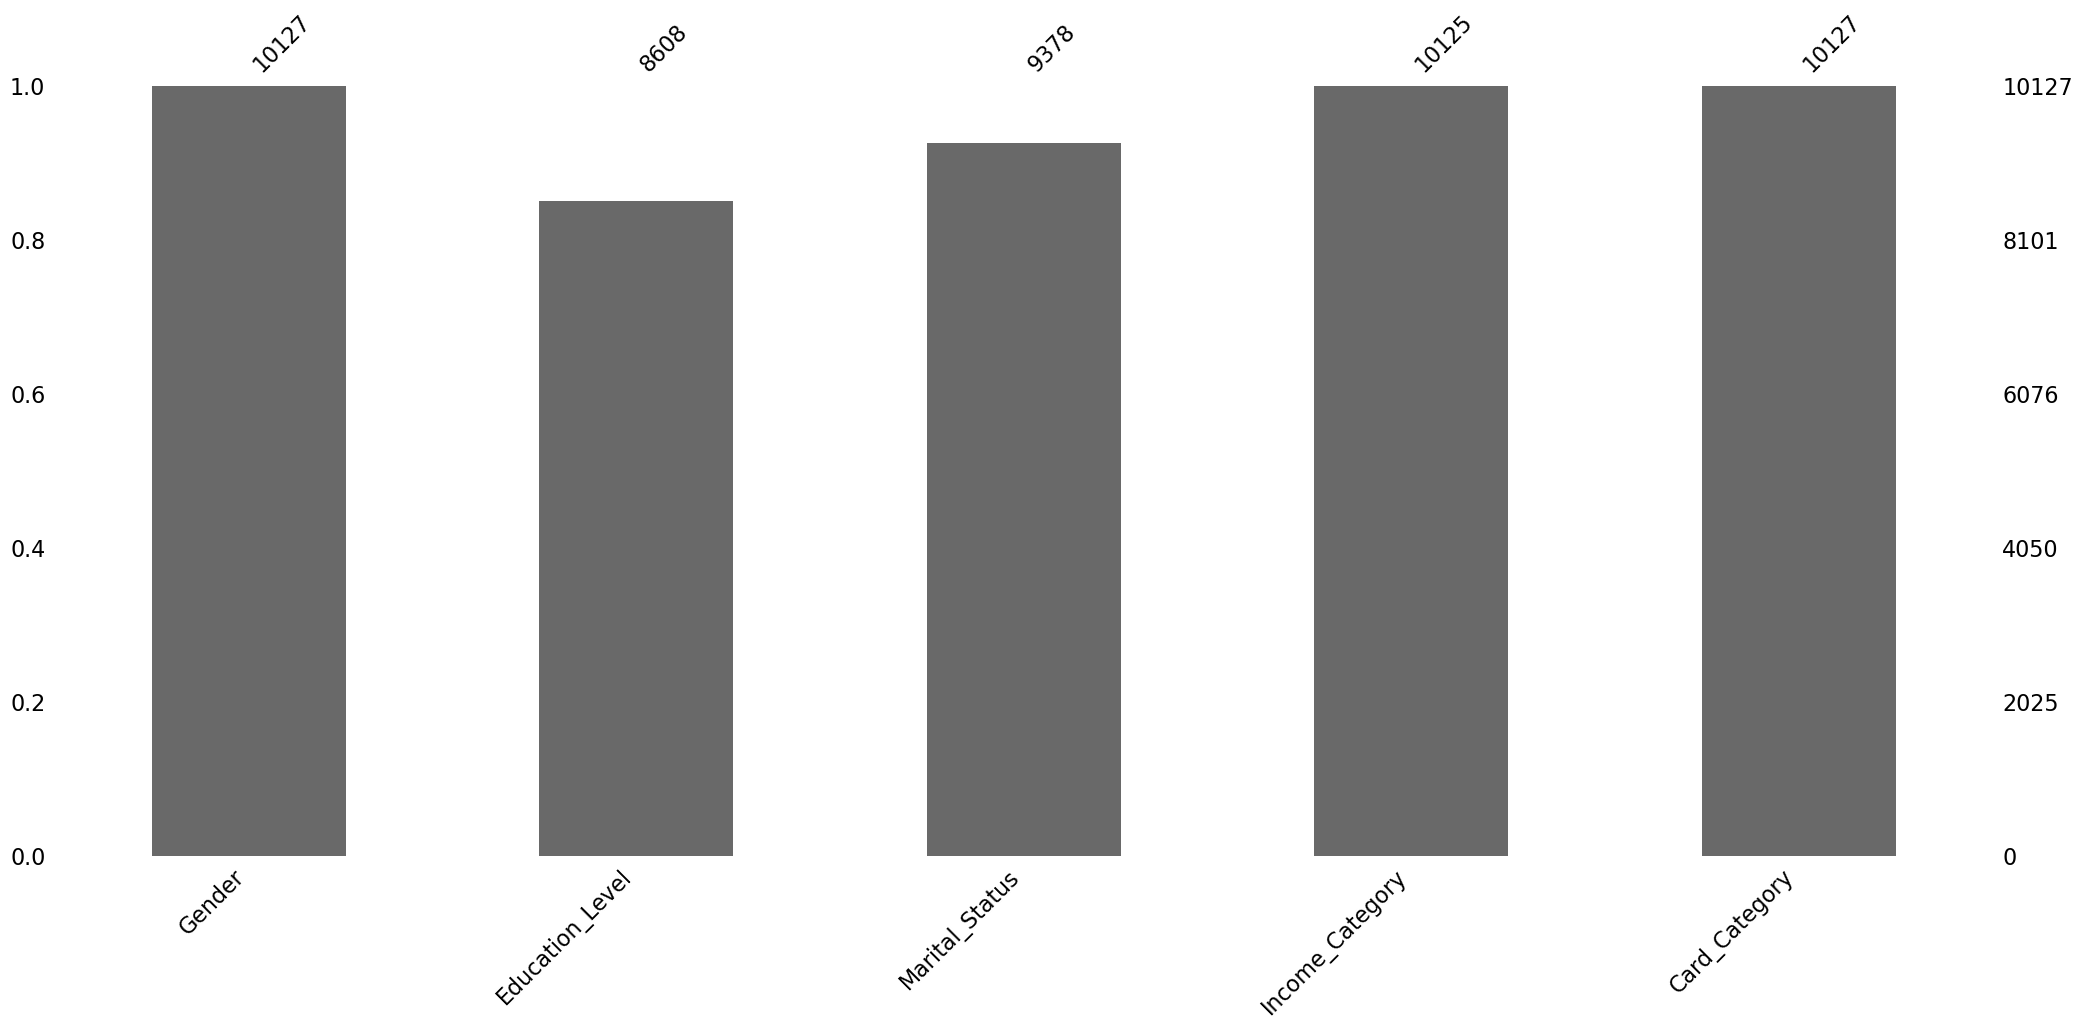

In [31]:
#Visualize missing values
msno.bar(data[categorical_columns])

Missing value imputation needs to be done on the following columns: Education_Level, Marital_Status and Income_Category. It is notable that Income_Category besides 2 missing values, also has a lot of entries under the label 'abc' which will also be considered missing values.

In [32]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [33]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')

In [34]:
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [35]:
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')

In [36]:
data['Income_Category'].value_counts()

Less than $40K    3560
$40K - $60K       1789
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

In [37]:
data['Income_Category'] = data['Income_Category'].replace('abc','Unknown')

In [38]:
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [39]:
data[categorical_columns].isnull().sum()

Gender             0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
dtype: int64

Now there are no missing values left

c) Feature variance

Looking for columns with only 1 value

In [40]:
data[categorical_columns].nunique()

Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

If there would have been columns with an unique value, that column would have been dropped, as such a column brings no value whatsoever for the set objective. In this particular case, nothing needs to be done

d) Categorical encoding

Check for the number and percentage of different values for each column

In [41]:
data[categorical_columns].nunique()

Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [42]:
data['Attrition_Flag'].value_counts() / len(data) * 100

0    83.934038
1    16.065962
Name: Attrition_Flag, dtype: float64

In [43]:
data['Education_Level'].value_counts() / len(data) * 100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64

In [44]:
data['Marital_Status'].value_counts() / len(data) * 100

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

In [45]:
data['Income_Category'].value_counts() / len(data) * 100

Less than $40K    35.153550
$40K - $60K       17.665646
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           11.000296
$120K +            7.178829
Name: Income_Category, dtype: float64

In [46]:
data['Card_Category'].value_counts() / len(data) * 100

Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64

Because of how dominant 'Blue' category is in 'Card_Category' feature and the discrepancy of percentages, rare label encoding can be applied to group all non-'Blue' category in only one category called 'Others'. Other option would be to keep 'Blue' and 'Silver' categories, and only group 'Gold' and 'Platinum' to category 'Gold/Platinum', as it is also considerably discrepant from Silver. Here, the second approach will be taken

In [47]:
values = data['Card_Category'].value_counts() / len(data) * 100

In [48]:
data['Card_Category'] = np.where(data['Card_Category'].isin(values.index[2:]),'Gold/Platinum',data['Card_Category'])

In [49]:
data['Card_Category'].value_counts() / len(data) * 100

Blue             93.176656
Silver            5.480399
Gold/Platinum     1.342945
Name: Card_Category, dtype: float64

## 3.2 Numerical variables

In [50]:
numerical_columns = [col for col in data.columns if data[col].dtypes != 'object' and col != 'Attrition_Flag']

In [51]:
print('There are',len(numerical_columns),'numerical columns. These are',numerical_columns)

There are 15 numerical columns. These are ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Used_Bal', 'Total_Unused_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [52]:
data[numerical_columns].head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,3.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49.0,5.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51.0,3.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40.0,4.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40.0,3.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


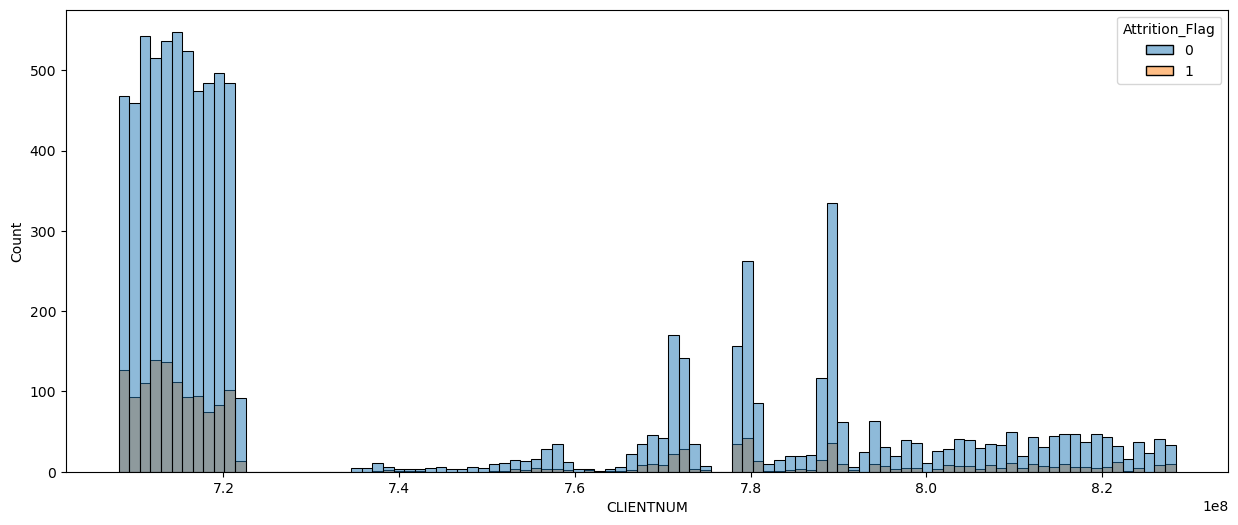

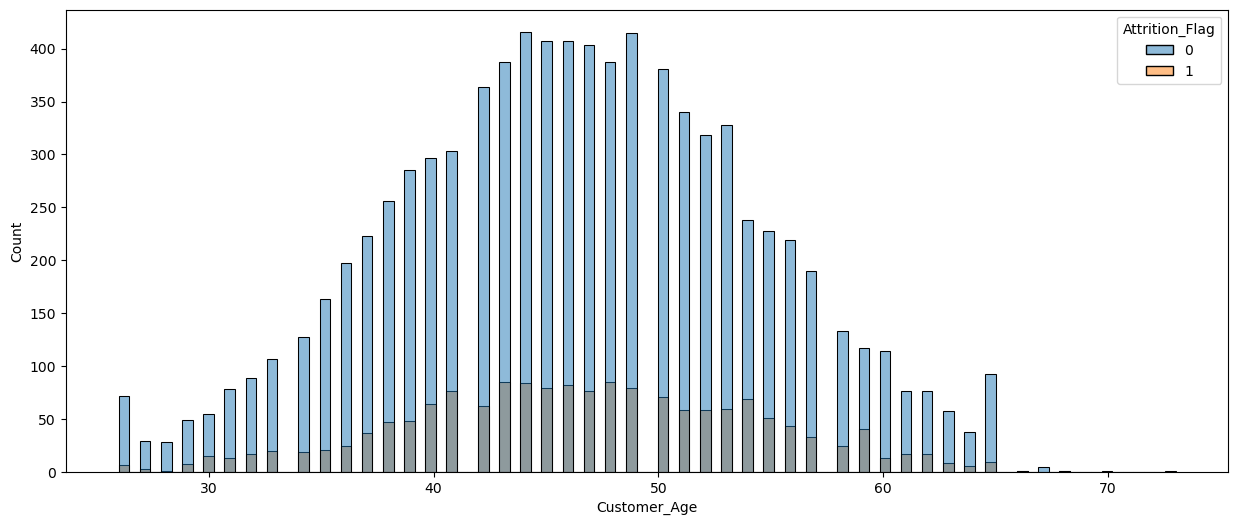

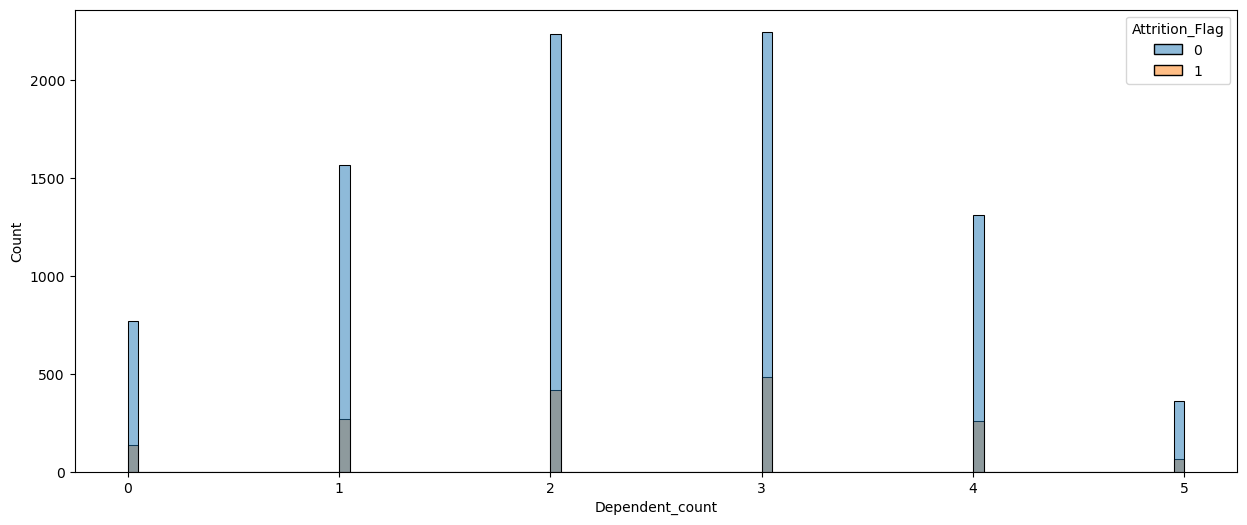

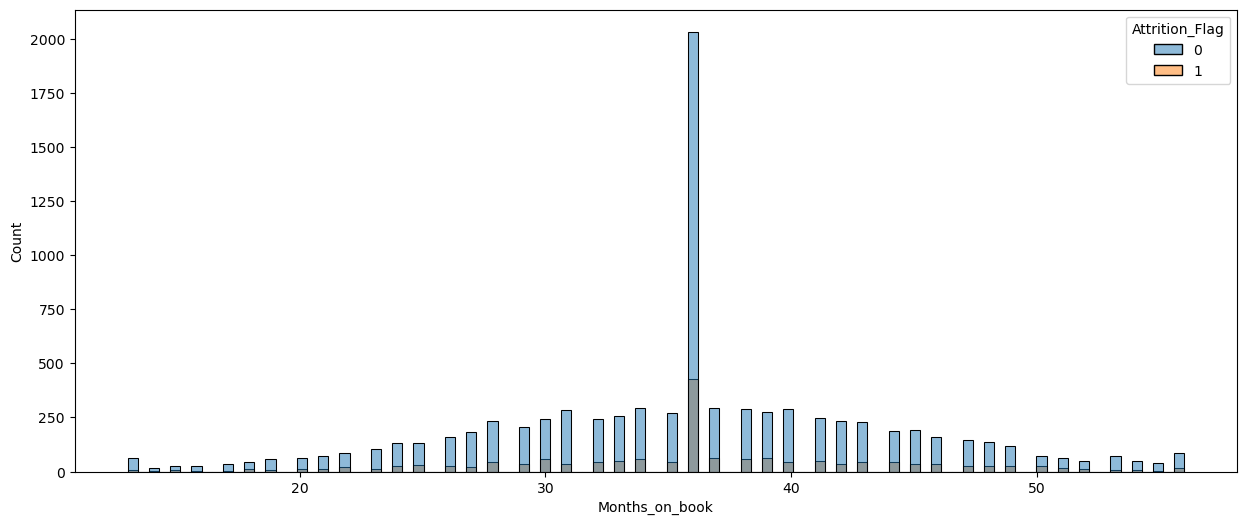

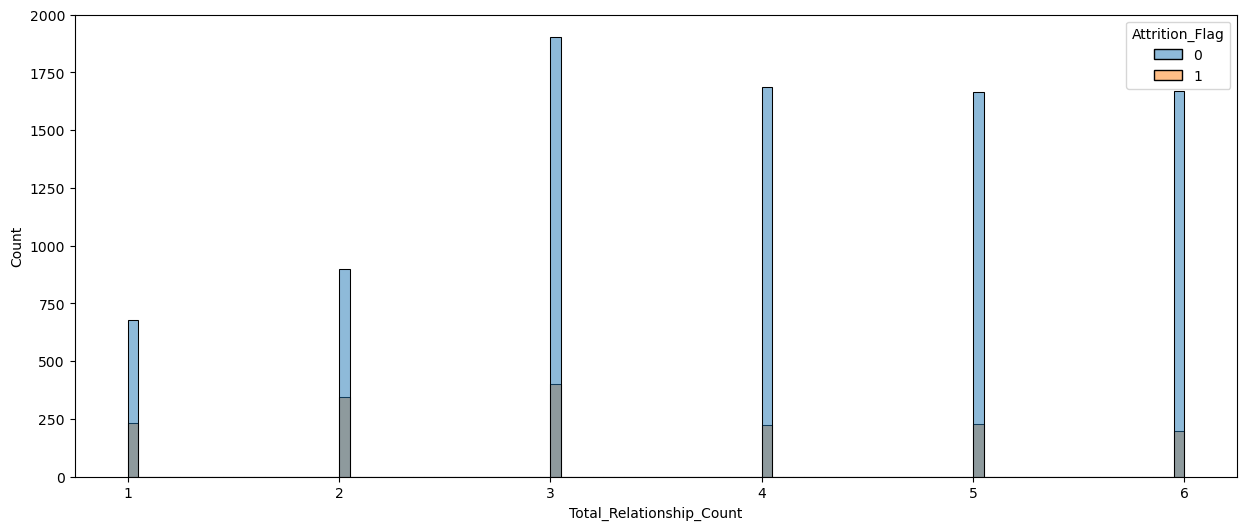

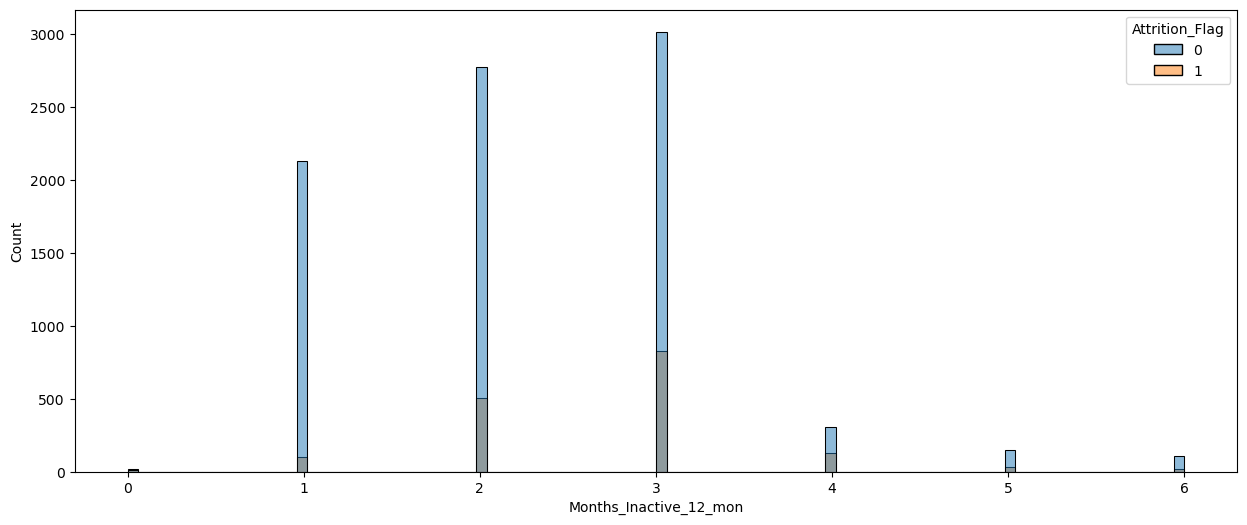

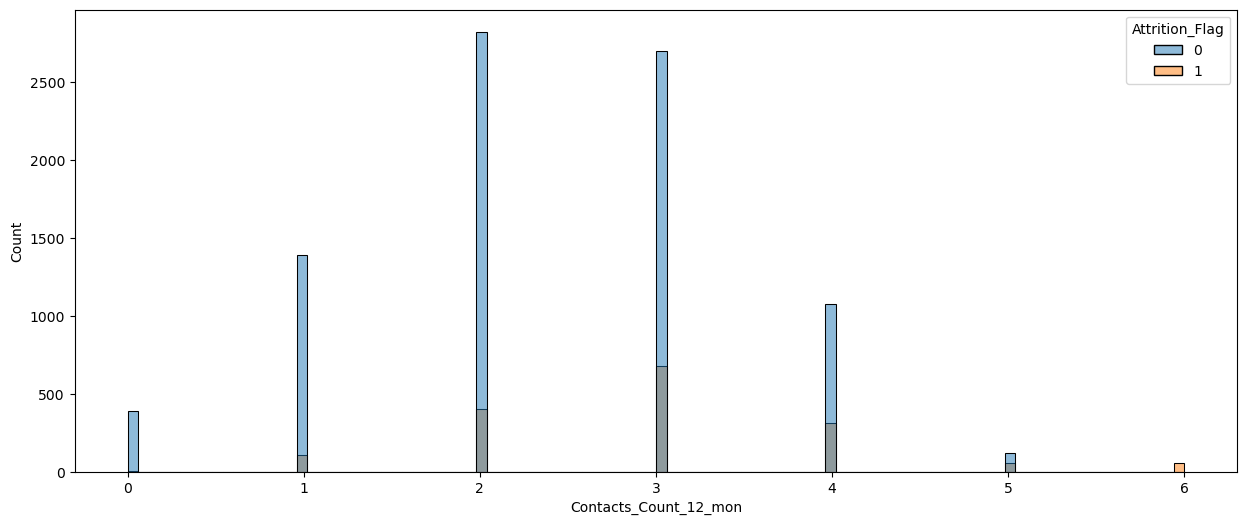

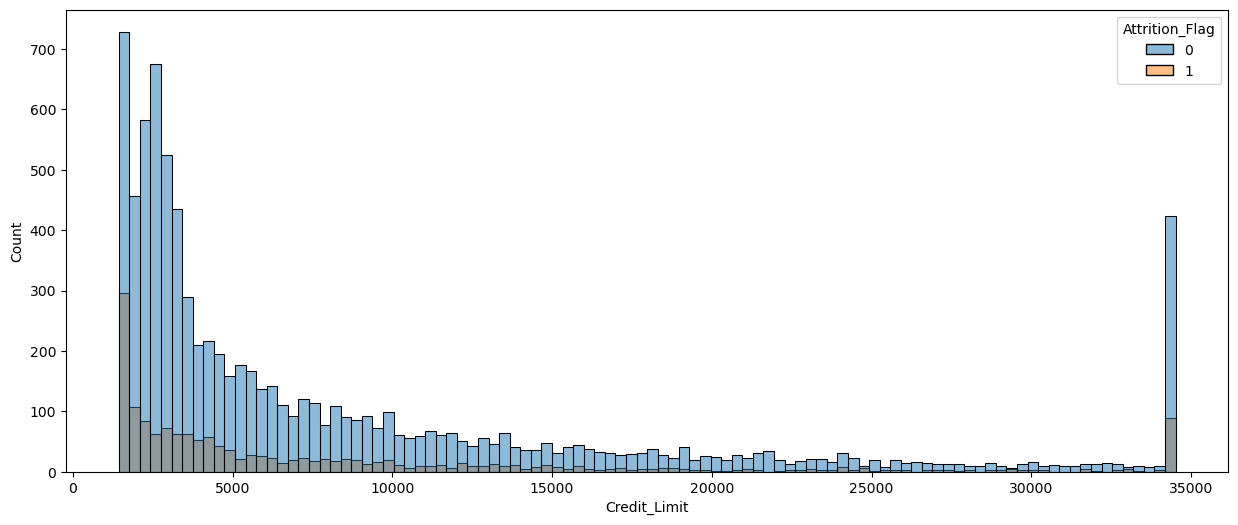

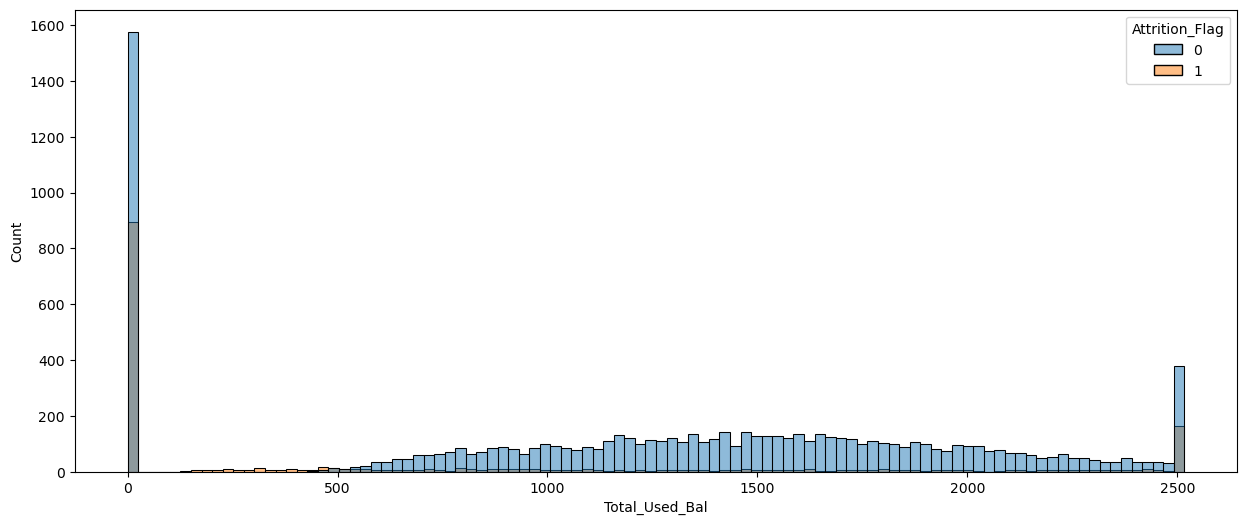

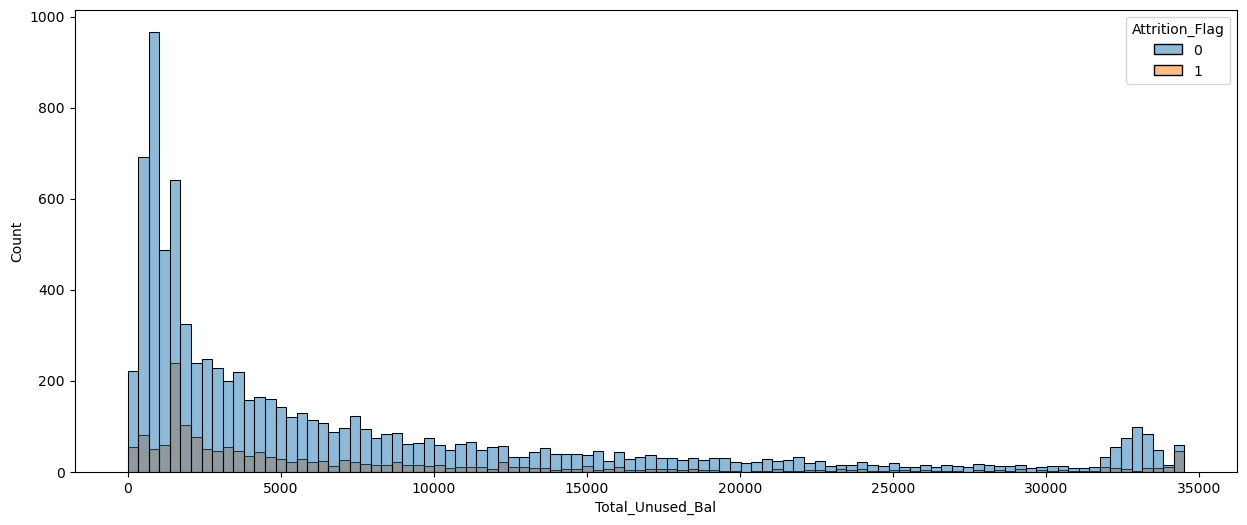

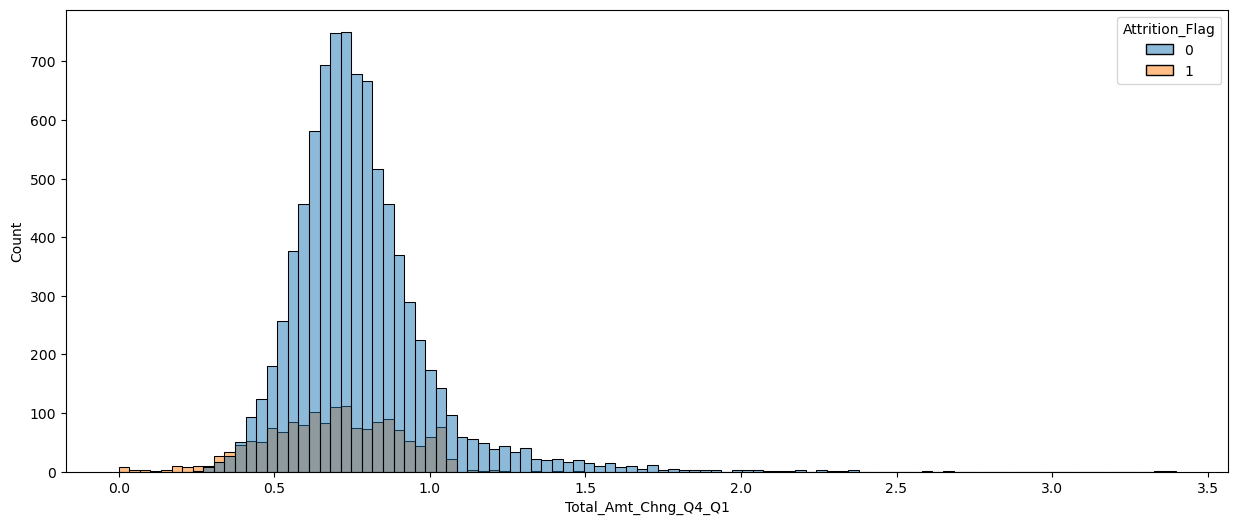

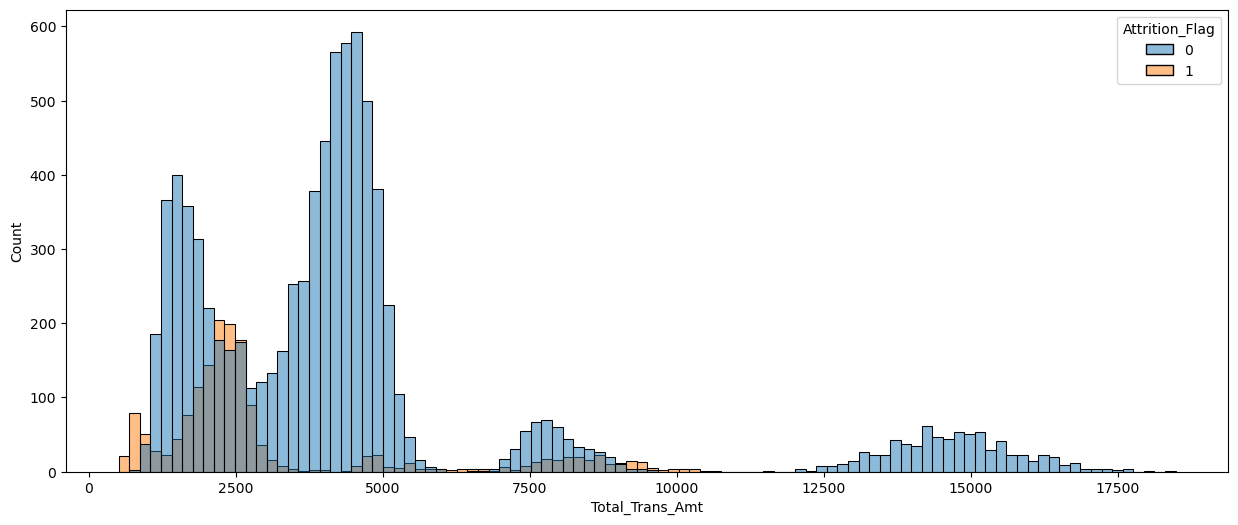

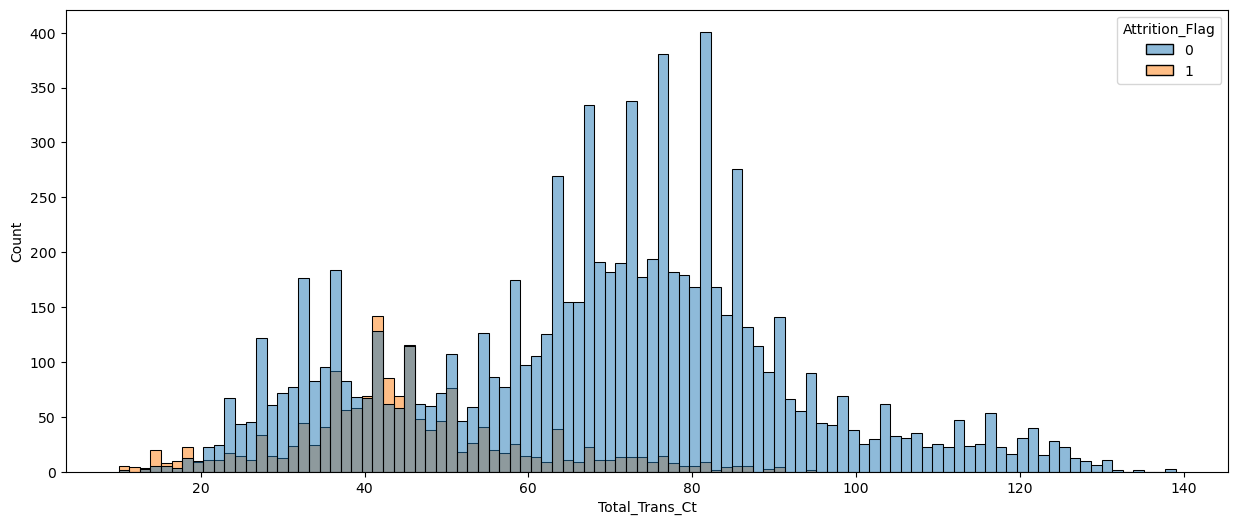

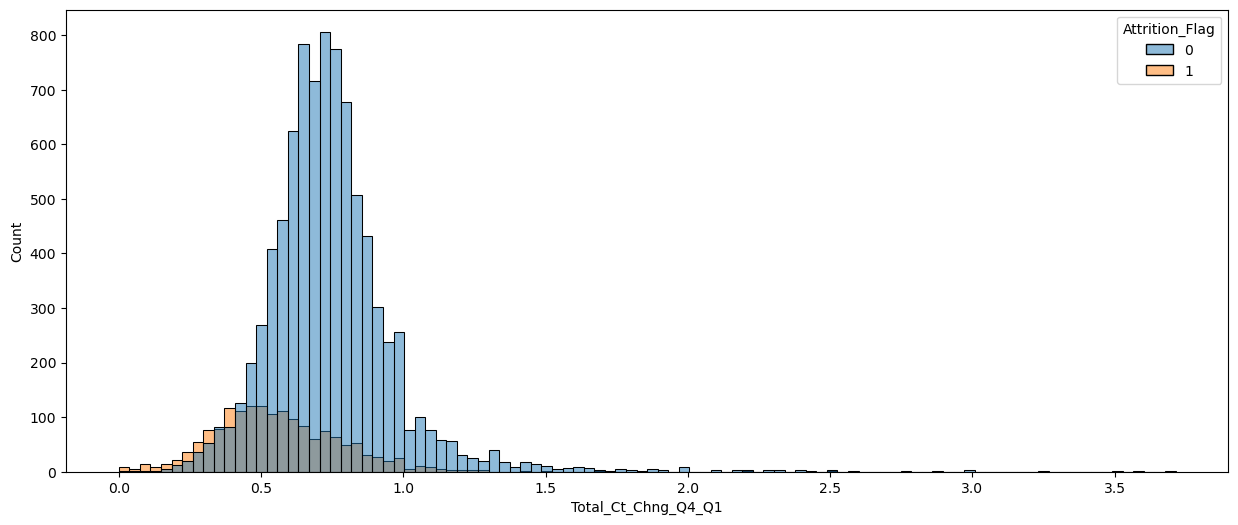

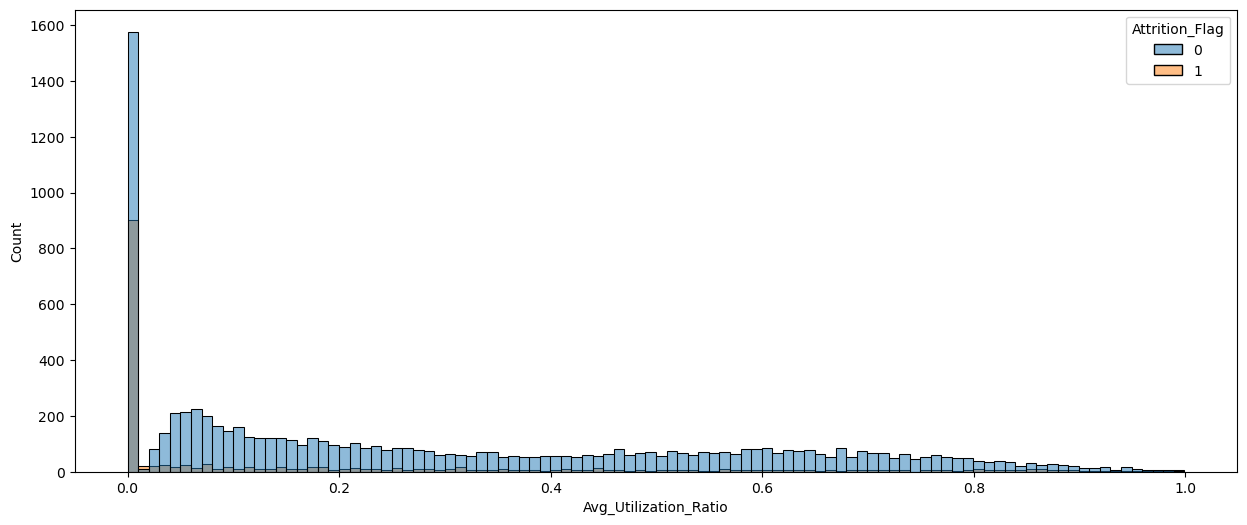

In [53]:
#graphics
for col in numerical_columns:
    fig,ax = plt.subplots(figsize = (15,6))
    sns.histplot(data = data, x = col, hue = 'Attrition_Flag', bins = 100)
    plt.show()

b) Missing values imputation

In [54]:
data[numerical_columns].isnull().sum()

CLIENTNUM                   0
Customer_Age                3
Dependent_count             5
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Used_Bal              0
Total_Unused_Bal            0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<AxesSubplot:>

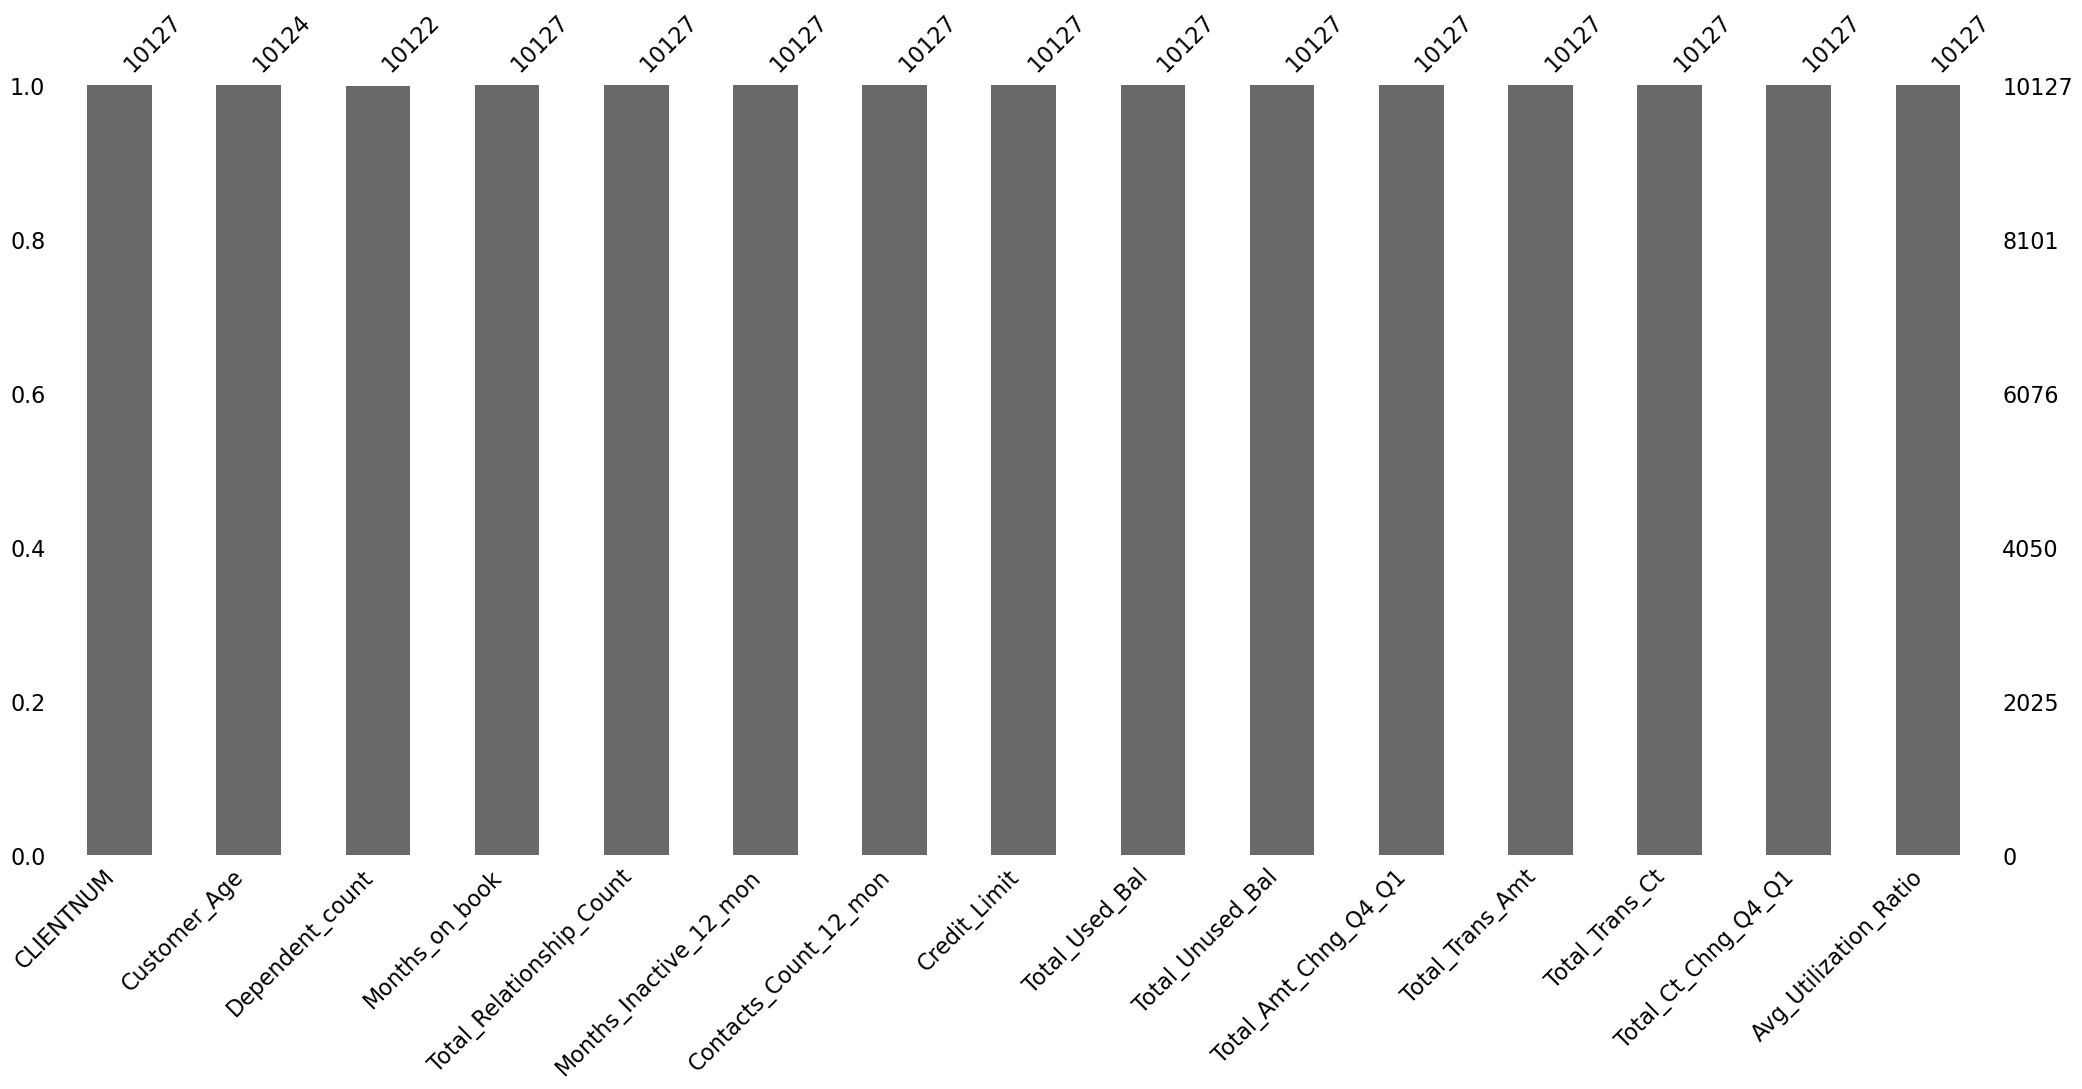

In [55]:
msno.bar(data[numerical_columns])

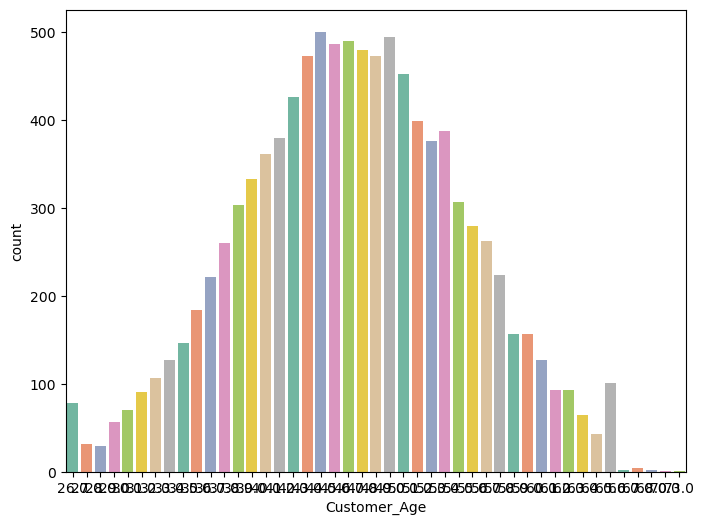

In [56]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Customer_Age',palette = 'Set2')
plt.show()

In [57]:
data['Customer_Age']

0        45.0
1        49.0
2        51.0
3        40.0
4        40.0
         ... 
10122    50.0
10123    41.0
10124    44.0
10125    30.0
10126    43.0
Name: Customer_Age, Length: 10127, dtype: float64

In [58]:
data['Customer_Age'] = data['Customer_Age'].fillna(np.floor(data['Customer_Age'].mean()))

In [59]:
data['Customer_Age'].isnull().sum()

0

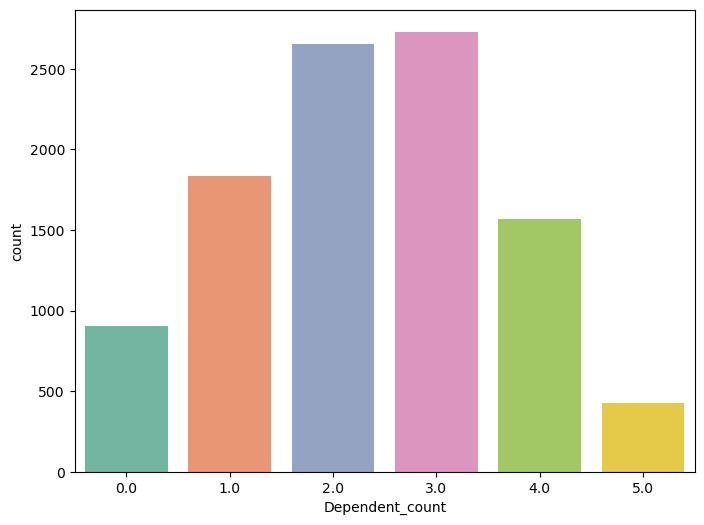

In [60]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = data, x = 'Dependent_count',palette = 'Set2')
plt.show()

In [61]:
data['Dependent_count'] = data['Dependent_count'].fillna(np.floor(data['Dependent_count'].median()))

In [62]:
data['Dependent_count'].isnull().sum()

0

Now there are no missing values for numerical categories.

c) Feature variance

In [63]:
#Constant variables

In [64]:
data[numerical_columns].nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Used_Bal               1974
Total_Unused_Bal             6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

 No columns with unique values, therefore no need to do anything for feature variance

d) Outliers detection

In [65]:
q1 = data['Credit_Limit'].quantile(0.25)
q3 = data['Credit_Limit'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 3 * IQR
upper_limit = q3 + 3 * IQR

In [66]:
data[(data['Credit_Limit'] < lower_limit) | (data['Credit_Limit'] > upper_limit)]['Credit_Limit']

Series([], Name: Credit_Limit, dtype: float64)

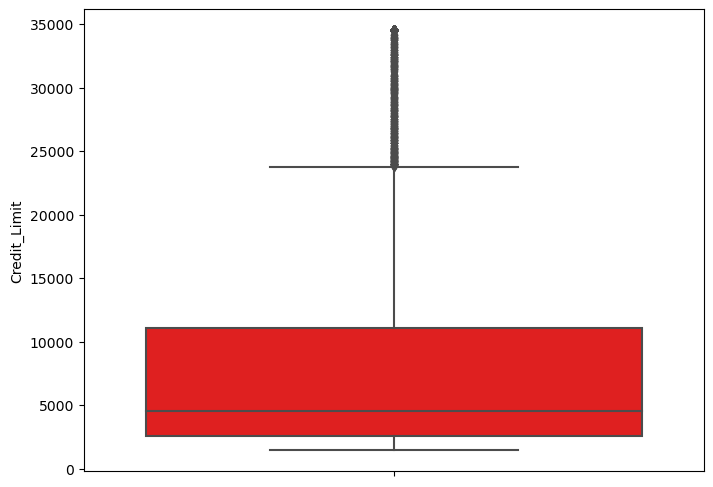

In [67]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(y = data['Credit_Limit'],color = 'red')
plt.show()

Check for each column if it has outliers

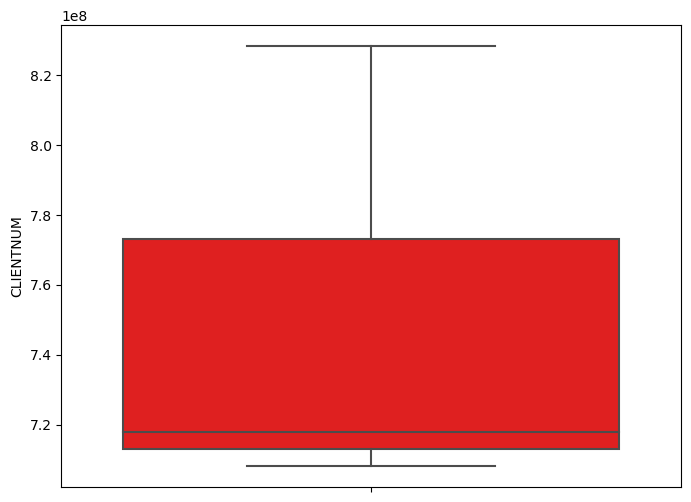

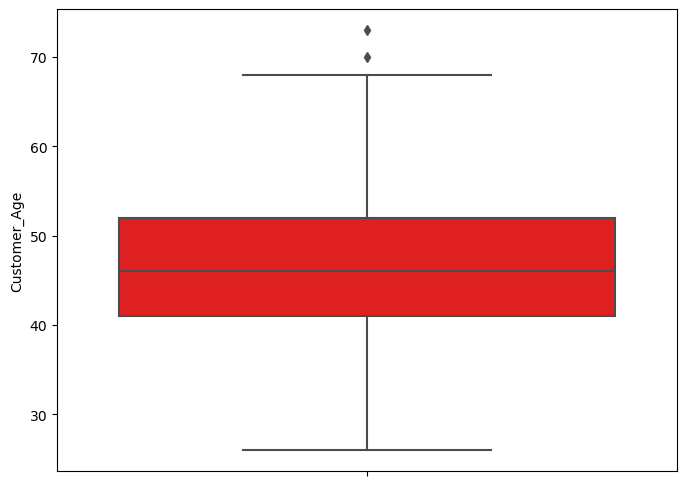

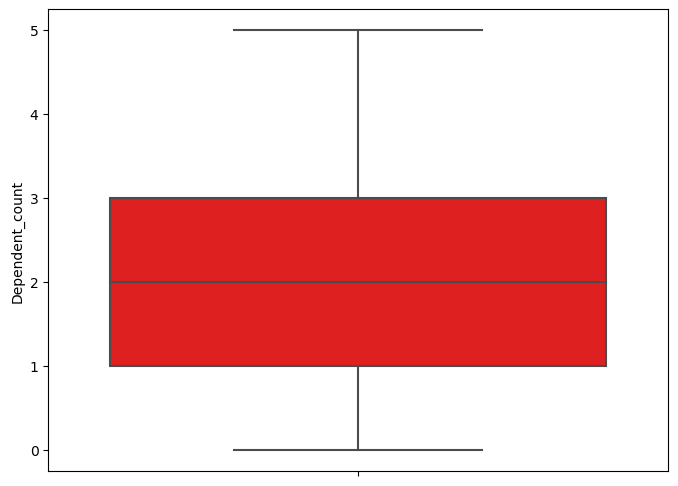

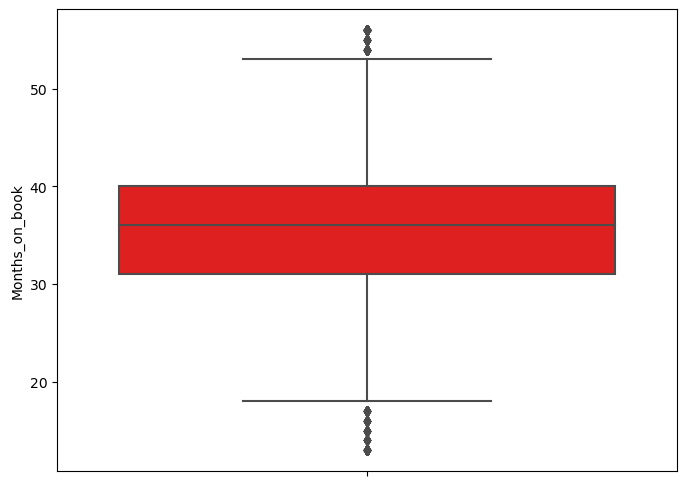

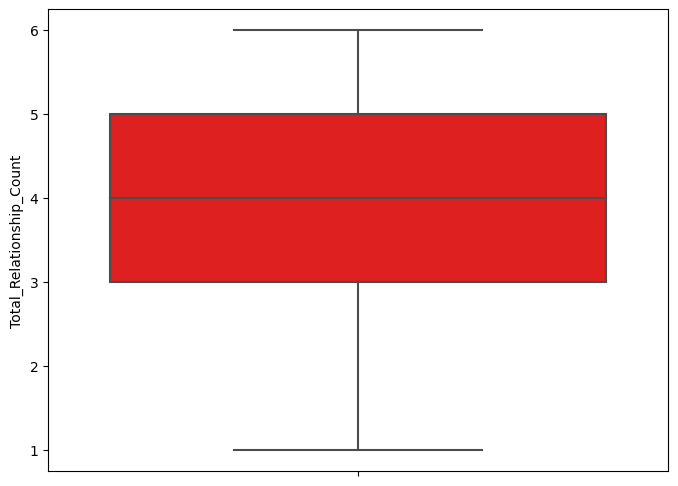

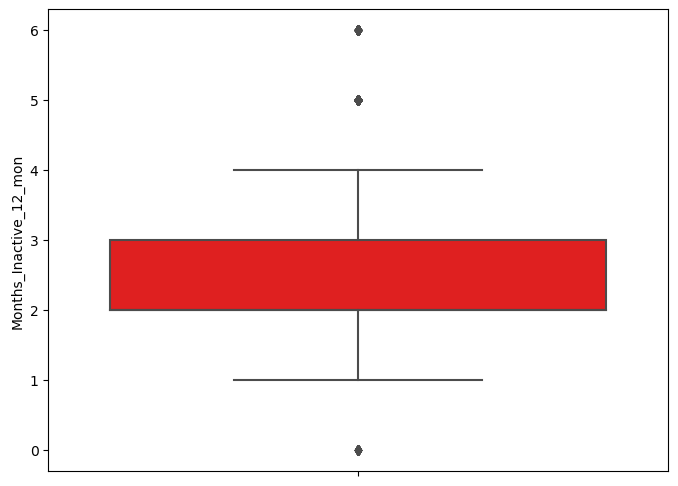

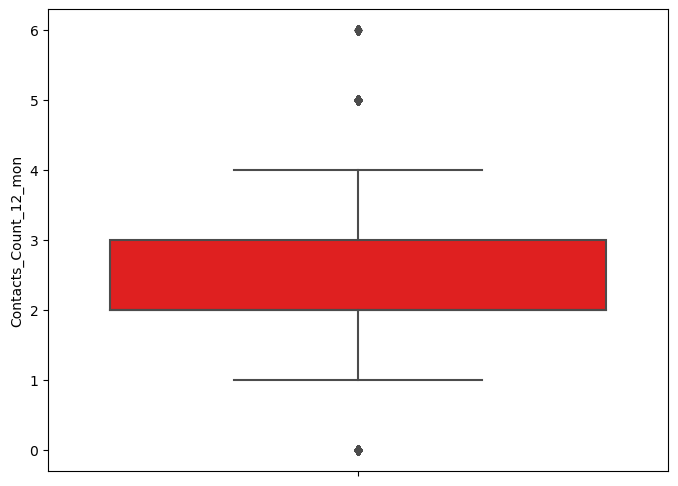

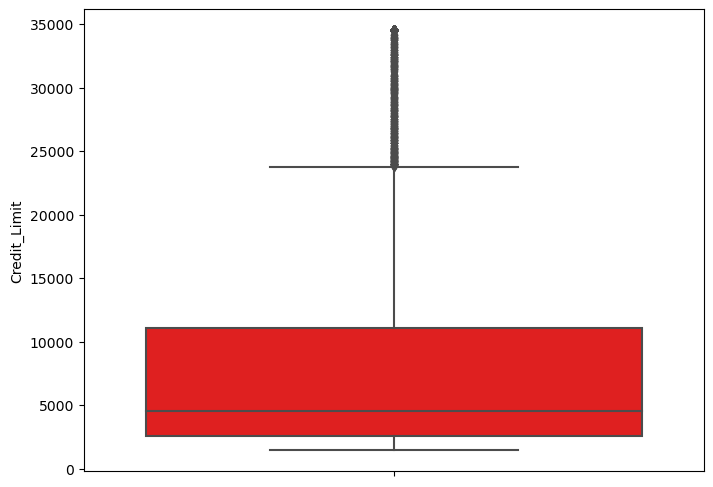

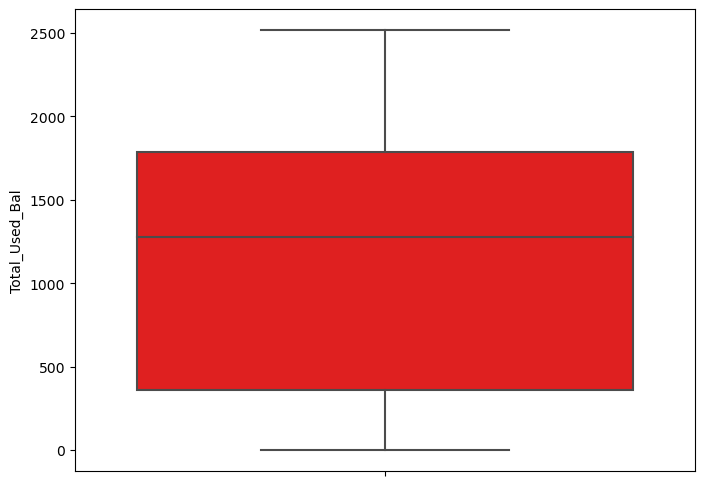

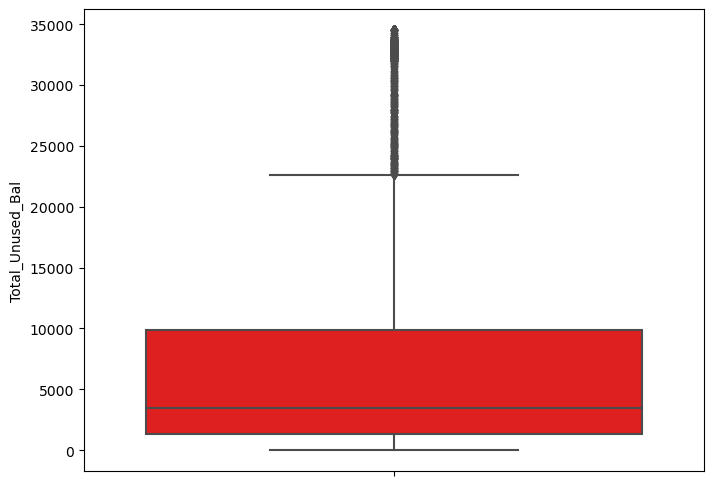

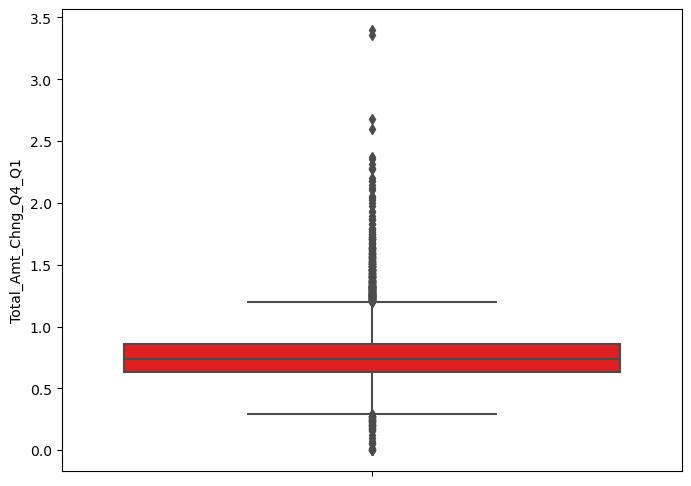

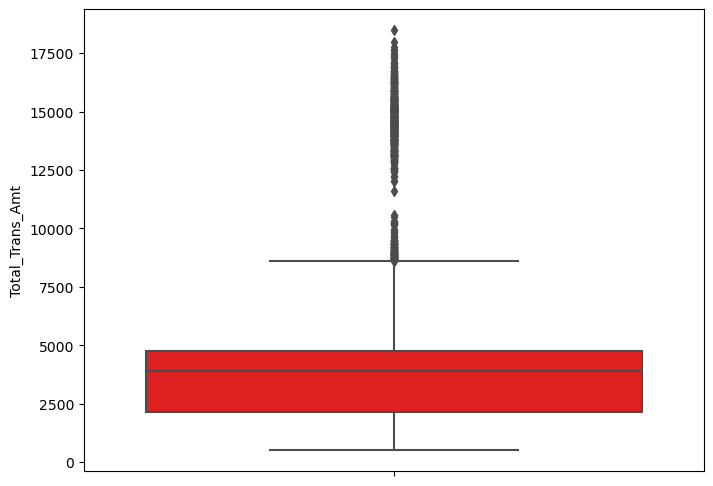

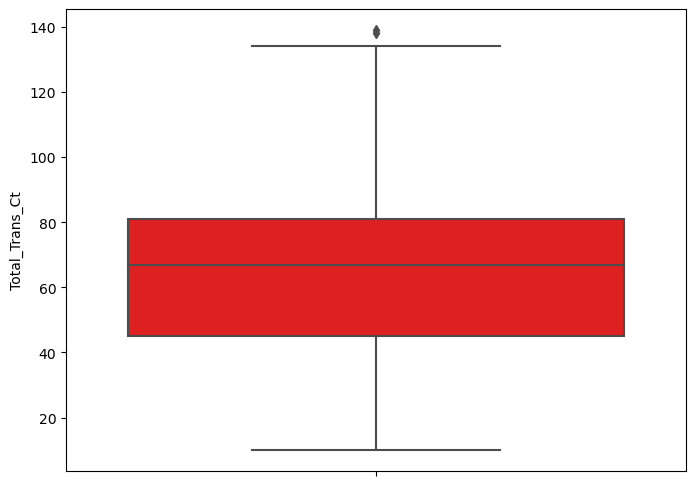

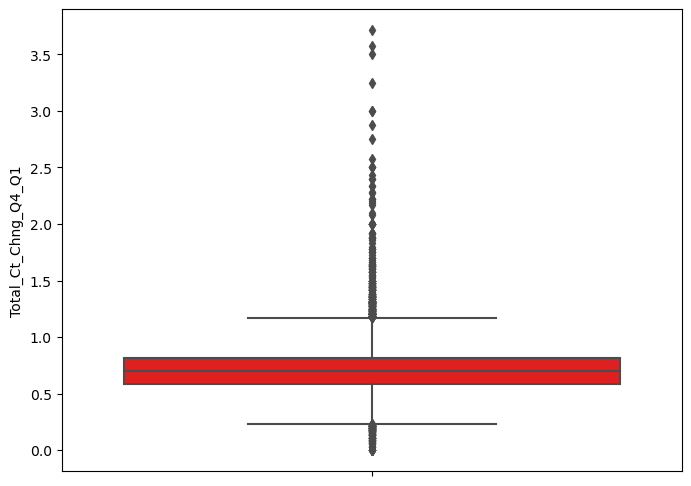

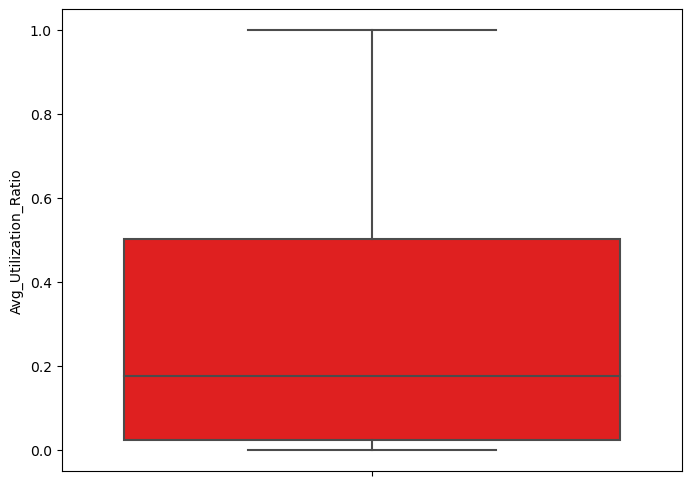

In [68]:
for col in numerical_columns:
    fig, ax = plt.subplots(figsize = (8,6))
    sns.boxplot(y = data[col],color = 'red')
    plt.show()

The features that are heavily affected by outliers are: Credit_Limit, Total_Unused_Bal, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1

In [69]:
heavy_affected_by_outliers = ['Credit_Limit', 'Total_Unused_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']

In [70]:
def censoring_outliers(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 3 * IQR
    upper_limit = q3 + 3 * IQR
    dataframe[column] = np.where(dataframe[column] < lower_limit, lower_limit, np.where(dataframe[column] > upper_limit, upper_limit, dataframe[column]))

In [71]:
for variable in heavy_affected_by_outliers:
    censoring_outliers(data, variable)

Through censoring, now there are no more outliers for heavy_affected_by_outliers columns. The other columns have either too few or no outliers, and nothing will be done there

e) Correlation

In [72]:
correlation = data[numerical_columns].corr()

In [73]:
correlation

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007555,0.007083,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.019504,-0.020926,-0.002961,0.007672,0.000266
Customer_Age,0.007555,1.000000,-0.122398,0.788891,-0.010931,0.054325,-0.018452,0.002556,0.014729,0.001234,-0.068957,-0.046037,-0.067088,-0.018825,0.007022
Dependent_count,0.007083,-0.122398,1.000000,-0.103357,-0.039238,-0.011519,-0.040601,0.068197,-0.002753,0.068430,-0.036400,0.032839,0.050815,0.011219,-0.037095
Months_on_book,0.134588,0.788891,-0.103357,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.055050,-0.037315,-0.049819,-0.018958,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039238,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.049542,-0.359299,-0.241891,0.041464,0.067663
Months_Inactive_12_mon,0.005729,0.054325,-0.011519,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032146,-0.036493,-0.042787,-0.043911,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040601,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.019470,-0.122814,-0.152213,-0.098280,-0.055471
Credit_Limit,0.005708,0.002556,0.068197,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012631,0.169344,0.075927,-0.006200,-0.482965
Total_Used_Bal,0.000825,0.014729,-0.002753,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.057863,0.059969,0.056060,0.095009,0.624022
Total_Unused_Bal,0.005633,0.001234,0.068430,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007441,0.163932,0.070885,-0.014717,-0.538808


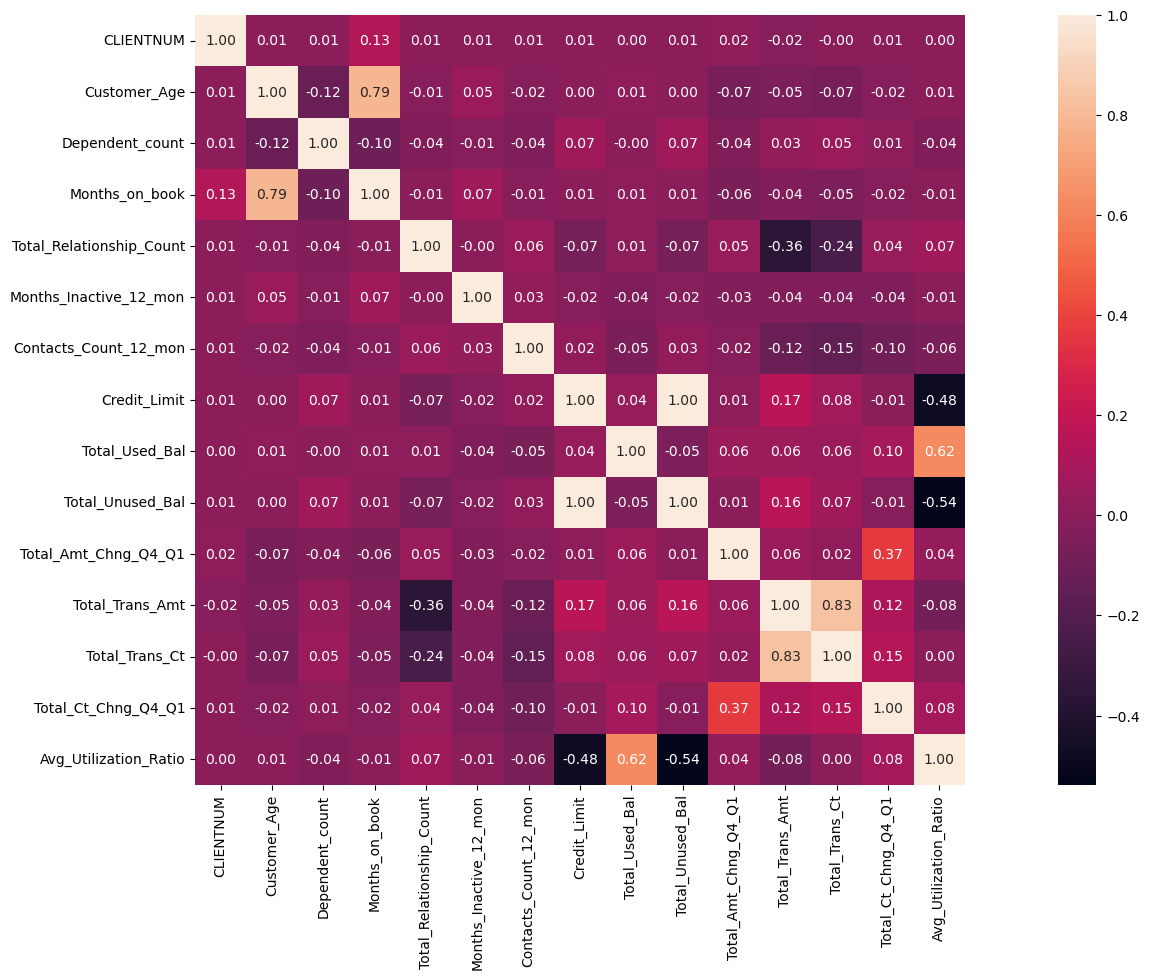

In [74]:
fig, ax = plt.subplots(figsize = (24,10))
sns.heatmap(correlation, annot = True, square = True, fmt = '.2f')
plt.show()

It is undesirable and bad for the model to have strong correlations. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison 

Correlation beyond 0.6 and below -0.6 will be considered too much for the model

First and formost Total_Unused_Bal needs to be get rid of in order to eliminate the covariance of 1 between it and Credit_Limit. In this particular case, getting rid of Avg_Utilization_Ratio will help get rid of 3 somewhat undesirable correlations : -0.48, 0.62 and -0.52. Besides that, getting rid of Total_Trans_Amt will get rid of 0.83 correlation and getting rid of Customer_Age will get rid of 0.79 correlation.

In [75]:
columns_to_drop = ['Total_Unused_Bal']
columns_to_drop.append('Avg_Utilization_Ratio')
columns_to_drop.append('Total_Trans_Amt')
columns_to_drop.append('Customer_Age')

numerical_columns.remove('Total_Unused_Bal')
numerical_columns.remove('Avg_Utilization_Ratio')
numerical_columns.remove('Total_Trans_Amt')
numerical_columns.remove('Customer_Age')

# E. Final dataset

In [76]:
print(columns_to_drop)

['Total_Unused_Bal', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Customer_Age']


In [77]:
data = data.drop(columns = columns_to_drop)

In [78]:
#Save dataset
data.to_csv('C:\\Users\\Valentin\\Desktop\\ASE\\AN 2\\AN 2 SEM 2\\Practica - BCR - TTJ\\TTJ project\\final_dataset.csv')

Note: The correlation after the 3 columns were dropped.

In [79]:
correlation = data[numerical_columns].corr()

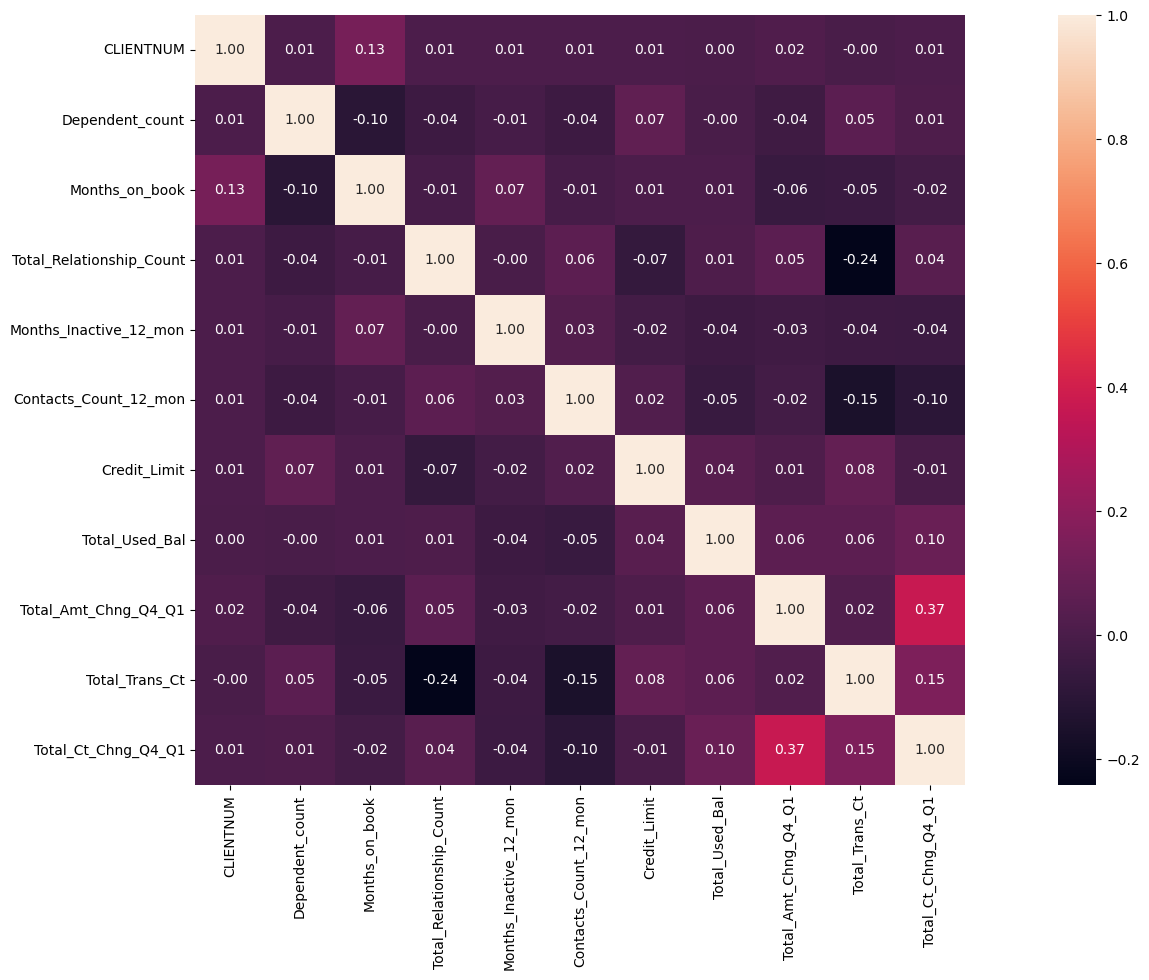

In [80]:
fig, ax = plt.subplots(figsize = (24,10))
sns.heatmap(correlation, annot = True, square = True, fmt = '.2f')
plt.show()

# *Model development*

In [81]:
data.head()

,CLIENTNUM,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,768805383,0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,42,1.526
1,818770008,0,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,33,1.526
2,713982108,0,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1.543,20,1.526
3,769911858,0,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,20,1.526
4,709106358,0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,1.543,28,1.526


In [82]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Used_Bal              0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
dtype: int64

# F. Classification

## 1. Declare independent variables and target variable

In [83]:
#independent variables
X = data.drop(columns = ['Attrition_Flag'])

#target variable
y = data['Attrition_Flag']

In [84]:
X.head()

,CLIENTNUM,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,768805383,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,42,1.526
1,818770008,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,33,1.526
2,713982108,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1.543,20,1.526
3,769911858,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,20,1.526
4,709106358,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,1.543,28,1.526


## 2. Perform data preprocessing

a) Check variables

'CLIENTNUM' is a column with no value for the model which will be trained, because it is nothing but an id. 'CLIENTNUM' column needs to be dropped.

In [85]:
X['CLIENTNUM'].nunique()

10127

In [86]:
X = X.drop(columns = ['CLIENTNUM'])

In [87]:
X.head()

,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,42,1.526
1,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,33,1.526
2,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1.543,20,1.526
3,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,20,1.526
4,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,1.543,28,1.526


b) Categorical encoding

One Hot Encoding

In [88]:
categorical_columns = [col for col in X.columns if X[col].dtypes == 'object']

In [89]:
categorical_columns

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [90]:
X = pd.get_dummies(X, columns = categorical_columns)

In [91]:
X.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,...,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold/Platinum,Card_Category_Silver
0,3.0,39,5,1,3,12691.0,777,1.335,42,1.526,...,0,0,0,1,0,0,0,1,0,0
1,5.0,44,6,1,2,8256.0,864,1.541,33,1.526,...,0,0,0,0,0,1,0,1,0,0
2,3.0,36,4,1,0,3418.0,0,1.543,20,1.526,...,0,0,0,0,1,0,0,1,0,0
3,4.0,34,3,4,1,3313.0,2517,1.405,20,1.526,...,1,0,0,0,0,1,0,1,0,0
4,3.0,21,5,1,0,4716.0,0,1.543,28,1.526,...,0,0,0,1,0,0,0,1,0,0


## 3. Split data into train and test sets

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 32), (2026, 32), (8101,), (2026,))

## 4. Random Forest

### 4.1 Train algorithm

Instantiate model

In [94]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 4, n_jobs = -1)

Train algorithm

In [95]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, n_jobs=-1)

### 4.2 Predict results

In [96]:
y_predict = rf.predict(X_test)

In [97]:
print(y_predict)

[0 0 0 ... 1 0 0]


### 4.3 Performance metrics

a) Accuracy score

In [98]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8726554787759131


The accuracy is very high, and that is a good thing. 87.5% of the predictions that were made were correct. But it is not enough to determine if the model is good or not. Further checks need to be made about different performance metrics

b) Confusion matrix

In [99]:
cm = confusion_matrix(y_test, y_predict)

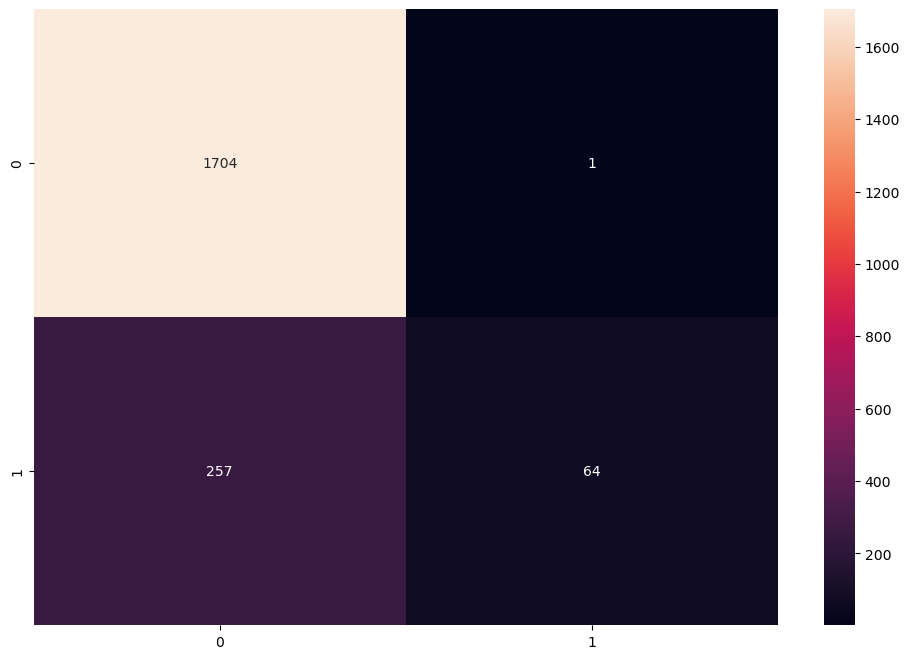

In [100]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

The model identifies way too many false negatives (south-west cell of the confusion matrix). While the model determines very well if a client falls in the '0' class, our category of interest is class '1', which is for churners. And regarding class '1', the model performs very poorly. The high accuracy was very misleading in this case, and other performance metrics shall show the underlying issues

In [101]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
print('Precision',precision)
print('Recall',recall)

Precision 0.9846153846153847
Recall 0.19937694704049844


Recall is very low, and it shows in the confusion matrix. For this model, out of the total number of churners, the model predicted only 26.16%.

d) AUC score

In [102]:
auc_score = roc_auc_score(y_test, y_predict)
print('AUC score',auc_score)

AUC score 0.5993952183882845


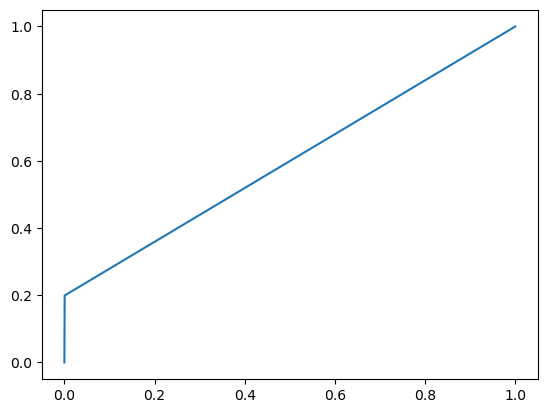

In [103]:
fpr, tpr, threshold = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)

An AUC score of 0.5 means we would try to predict randomly. This model's score of 0.629 is barely satisfactory. The goal for AUC score should be between 0.8-0.9

## 5. XGBoost

### 5.1 Train algorithm

In [104]:
xgb = XGBClassifier(n_estimators = 200, max_depth = 4, learning_rate = 0.1, n_jobs = -1)

In [105]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### 5.2 Predict results

In [106]:
y_predict = xgb.predict(X_test)

### 5.3 Performance metrics

a) Accuracy score

In [107]:
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy', accuracy)

Accuracy 0.9378084896347483


A better accuracy score than before is an improvement

b) Confusion matrix

In [108]:
cm = confusion_matrix(y_test, y_predict)

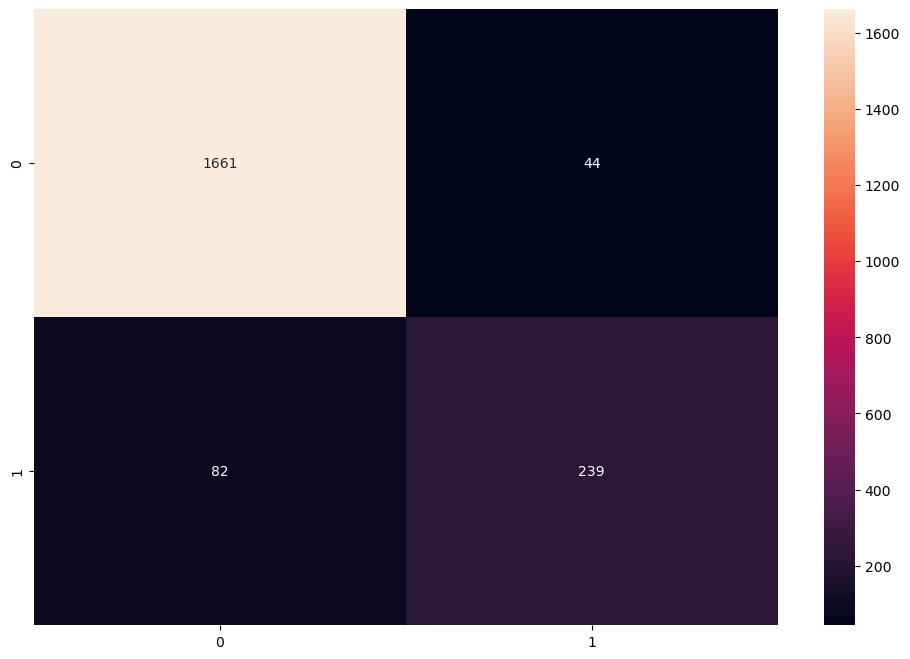

In [109]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

This model is far superior to the previous one. This model identifies way better the True Positives, which is the objective.

c) Precision, recall

In [110]:
precison = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
print('Precision',precision)
print('Recall',recall)

Precision 0.9846153846153847
Recall 0.7445482866043613


The superiority of this model is also reflected in the other performance metrics, which have good values

d) AUC score

In [111]:
auc_score = roc_auc_score(y_test, y_predict)
print('AUC',auc_score)

AUC 0.8593709174957291


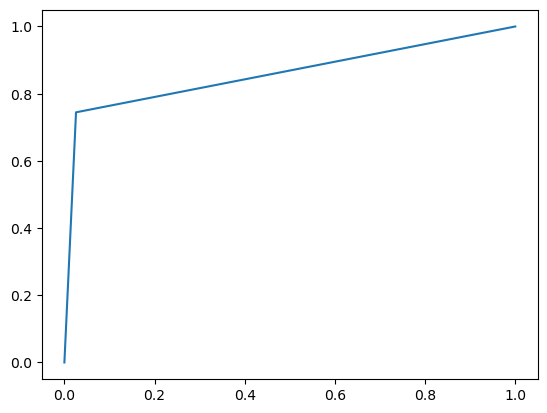

In [112]:
fpr, tpr, threshold = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)

The AUC score is very good. 

### 5.4 Check for overfitting / underfitting

In [113]:
y_predict_train = xgb.predict(X_train)
y_predict_test = xgb.predict(X_test)
auc_score_train = roc_auc_score(y_train, y_predict_train)
auc_score_test = roc_auc_score(y_test, y_predict_test)
print('AUC train', auc_score_train)
print('AUC test', auc_score_test)

AUC train 0.9176321545321475
AUC test 0.8593709174957291


The model is not overfitting or underfitting, as it performs well on test as well

## 6. Hyperparameters tuning

a) Declare possible hyperparameters

In [114]:
n_estimators = [200, 300]
max_depth = [3, 4]
learning_rate = [0.05, 0.1]

b) Find best hyperparameters

In [115]:
results = []
for est in n_estimators:
    for md in max_depth:
        for lr in learning_rate:
            xgb = XGBClassifier(n_estimators = est, max_depth = md, rate = lr, n_jobs = -1)
            xgb.fit(X_train, y_train)
            y_predict = xgb.predict(X_test)
            auc_score = roc_auc_score(y_test, y_predict)
            results.append(['n_estimators',est,'max_depth',md,'learning rate',lr,'AUC',auc_score])

[01:17:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rate" } are not used.

[01:17:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rate" } are not used.

[01:17:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rate" } are not used.

[01:17:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rate" } are not used.

[01:17:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rate" } are not used.

[01:17:36] WARNING: C:/buildki

In [116]:
print(results)

[['n_estimators', 200, 'max_depth', 3, 'learning rate', 0.05, 'AUC', 0.8782452197586356], ['n_estimators', 200, 'max_depth', 3, 'learning rate', 0.1, 'AUC', 0.8782452197586356], ['n_estimators', 200, 'max_depth', 4, 'learning rate', 0.05, 'AUC', 0.8626688957710966], ['n_estimators', 200, 'max_depth', 4, 'learning rate', 0.1, 'AUC', 0.8626688957710966], ['n_estimators', 300, 'max_depth', 3, 'learning rate', 0.05, 'AUC', 0.8698705475009364], ['n_estimators', 300, 'max_depth', 3, 'learning rate', 0.1, 'AUC', 0.8698705475009364], ['n_estimators', 300, 'max_depth', 4, 'learning rate', 0.05, 'AUC', 0.8677264048382529], ['n_estimators', 300, 'max_depth', 4, 'learning rate', 0.1, 'AUC', 0.8677264048382529]]


In [117]:
##Check for overfitting
best_xgb = XGBClassifier(n_estimators = 300, max_depth = 3, learning_rate = 0.1, n_jobs = -1)
best_xgb.fit(X_train, y_train)
y_predict_test = best_xgb.predict(X_test)
y_predict_train = best_xgb.predict(X_train)
auc_score_test = roc_auc_score(y_test, y_predict_test)
auc_score_train = roc_auc_score(y_train, y_predict_train)
print('AUC train',auc_score_train)
print('AUC test',auc_score_test)

AUC train 0.9054407292092758
AUC test 0.8717406199468303


It is not overfitting

## 7.Save the model

In [118]:
with open("C:\\Users\\Valentin\\Desktop\\ASE\\AN 2\\AN 2 SEM 2\\Practica - BCR - TTJ\\TTJ project\\best_model_xgb.pkl",'wb') as file:
    pickle.dump(best_xgb, file)

# *Model explainability*

# G. Explainability

## 1. Import saved model

In [119]:
with open('C:\\Users\\Valentin\\Desktop\\ASE\\AN 2\\AN 2 SEM 2\\Practica - BCR - TTJ\\TTJ project\\best_model_xgb.pkl','rb') as file:
    model = pickle.load(file)

## 2. Train test split

In [120]:
#independent variables
X = data.drop(columns = ['Attrition_Flag'])

#target variable
y = data['Attrition_Flag']

In [121]:
#drop column 'CLIENTNUM'
X = X.drop(columns = ['CLIENTNUM'])

In [122]:
#categorical encoding
categorical_columns = [col for col in X.columns if X[col].dtypes == 'object']
X = pd.get_dummies(X, columns = categorical_columns)

In [123]:
print(categorical_columns)

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [124]:
X.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,...,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold/Platinum,Card_Category_Silver
0,3.0,39,5,1,3,12691.0,777,1.335,42,1.526,...,0,0,0,1,0,0,0,1,0,0
1,5.0,44,6,1,2,8256.0,864,1.541,33,1.526,...,0,0,0,0,0,1,0,1,0,0
2,3.0,36,4,1,0,3418.0,0,1.543,20,1.526,...,0,0,0,0,1,0,0,1,0,0
3,4.0,34,3,4,1,3313.0,2517,1.405,20,1.526,...,1,0,0,0,0,1,0,1,0,0
4,3.0,21,5,1,0,4716.0,0,1.543,28,1.526,...,0,0,0,1,0,0,0,1,0,0


In [125]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [126]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 32), (2026, 32), (8101,), (2026,))

## 3. Predict

In [127]:
#predict
y_predict = model.predict(X_test)

In [128]:
y_predict

array([0, 0, 0, ..., 1, 0, 0])

Predict likelihood of target variable (propensity probabilities)

In [129]:
y_predict_proba = model.predict_proba(X_test)

In [130]:
y_predict_proba

array([[0.8347981 , 0.1652019 ],
       [0.9753464 , 0.02465363],
       [0.9966662 , 0.00333382],
       ...,
       [0.00679225, 0.99320775],
       [0.9912621 , 0.00873791],
       [0.975245  , 0.02475499]], dtype=float32)

Out of the two probabilities, we are interested in probabilities of class 1

In [131]:
y_predict_proba_class_1 = y_predict_proba[:,1]

In [132]:
y_predict_proba_class_1

array([0.1652019 , 0.02465363, 0.00333382, ..., 0.99320775, 0.00873791,
       0.02475499], dtype=float32)

## 4. Performance metrics

### 4.1 AUC score for probabilities

In [133]:
auc_score = roc_auc_score(y_test, y_predict_proba_class_1)
print(auc_score)

0.9668959720813806


### 4.2 Lift and Gain analysis

In [134]:
#declare an empty DataFrame
lift_gain_report = pd.DataFrame()

#add y_test in DataFrame
lift_gain_report['y_test'] = y_test

#### STEP 1 ####
#add predict probabilities for class 1 in DataFrame
lift_gain_report['Predicted Probabilities'] = y_predict_proba_class_1

#order proabilities in ascending order
lift_gain_report['Probabilities Rank'] = lift_gain_report['Predicted Probabilities'].rank(method = 'first',ascending = True, pct = True)

#### STEP 2 ####
#calculate decile group
lift_gain_report['Decile group'] = np.floor((1 - lift_gain_report['Probabilities Rank']) * 10) + 1

#### STEP 3 ####
#group observations by decile
lift_gain_report['Number of observations'] = 1
lift_gain_report = lift_gain_report.groupby(['Decile group']).sum().reset_index()

#cumulative number of observations
lift_gain_report['Cumulative no. of observations'] = lift_gain_report['Number of observations'].cumsum()

#cumulative percentage of observations
lift_gain_report['Cumulative % of no. of observations'] = lift_gain_report['Cumulative no. of observations'] / lift_gain_report['Cumulative no. of observations'].max()

#### STEP 4 ####
#calculate number of positives cumulative
lift_gain_report['Cumulative no. of positives'] = lift_gain_report['y_test'].cumsum()

#### STEP 5 ####
#calculate cumulative percentage of positives(Gain)
lift_gain_report['Gain'] = lift_gain_report['Cumulative no. of positives'] / lift_gain_report['Cumulative no. of positives'].max()

#### STEP 6 ####
#calculate Lift
lift_gain_report['Lift'] = lift_gain_report['Gain'] / lift_gain_report['Cumulative % of no. of observations']

lift_gain_report

,Decile group,y_test,Predicted Probabilities,Probabilities Rank,Number of observations,Cumulative no. of observations,Cumulative % of no. of observations,Cumulative no. of positives,Gain,Lift
0,1.0,192,188.237625,192.880059,203,203,0.100197,192,0.598131,5.969523
1,2.0,91,95.156349,172.539980,203,406,0.200395,283,0.881620,4.399414
2,3.0,20,27.509314,151.500000,202,608,0.300099,303,0.943925,3.145382
3,4.0,9,10.161255,131.960020,203,811,0.400296,312,0.971963,2.428109
4,5.0,3,4.844729,111.119941,202,1013,0.500000,315,0.981308,1.962617
5,6.0,6,2.393981,91.380059,203,1216,0.600197,321,1.000000,1.666118
6,7.0,0,1.115174,71.039980,203,1419,0.700395,321,1.000000,1.427766
7,8.0,0,0.528590,50.500000,202,1621,0.800099,321,1.000000,1.249846
8,9.0,0,0.236480,30.460020,203,1824,0.900296,321,1.000000,1.110746
9,10.0,0,0.066476,10.119941,202,2026,1.000000,321,1.000000,1.000000


INTERPRETATION: 
    
By targeting 10% of the cases with highest probability, we can reach 59.81% of the total positives (churners). By targeting the first decile, we can reach an efficiency of 5.96 times better than if the selection would have been made at random.

By targeting 20% of the cases with highest probability, we can reach 88.16% of total churners. By targeting the second decile, we can reach an efficiency of 4.39 times better than if the selection would have been made at random.

And so on based on the output above this comment

### 4.3. Lift and Gain charts

a) Lift chart

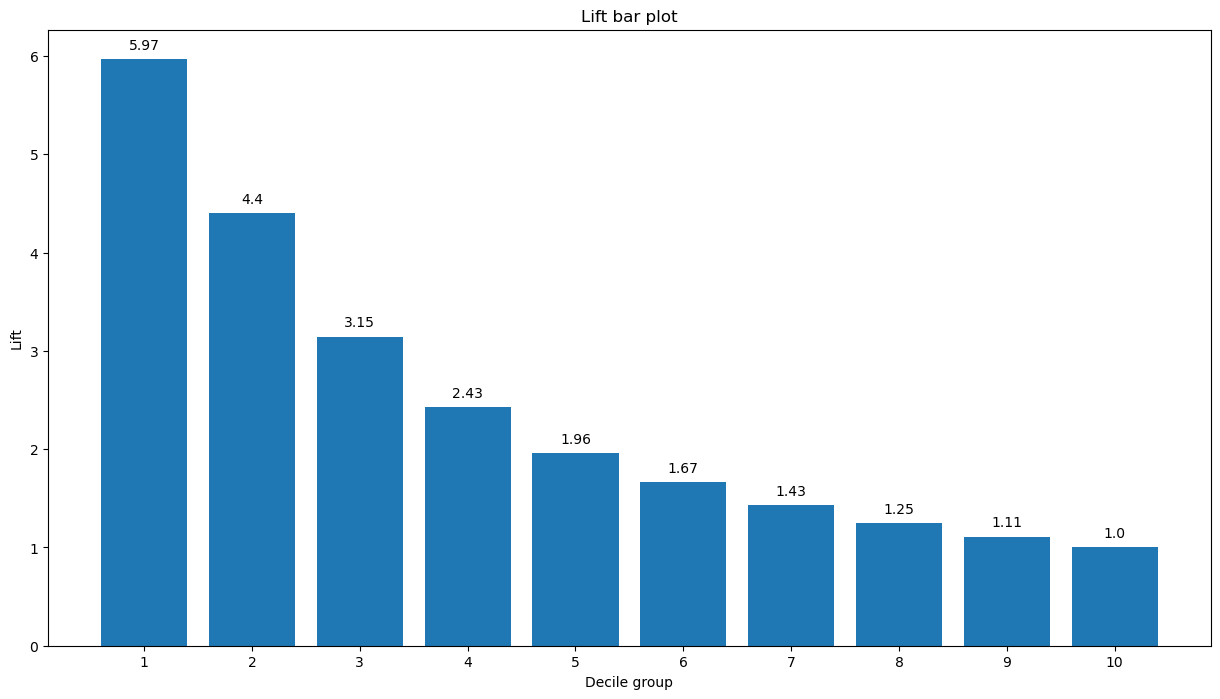

In [135]:
fig, ax = plt.subplots(figsize = (15, 8))
barplot = plt.bar(lift_gain_report['Decile group'],lift_gain_report['Lift'])
plt.title('Lift bar plot')
plt.xlabel('Decile group')
plt.ylabel('Lift')
plt.xticks(lift_gain_report['Decile group'])

#add text above bars in chart
for b in barplot:
    plt.text(b.get_x() + b.get_width() / 2, b.get_height()+0.1, round(b.get_height(), 2), ha = 'center')

plt.show()

b) Gain chart

In [136]:
lift_gain_report['Random Selection'] = lift_gain_report['Decile group'] / lift_gain_report['Decile group'].max()

In [137]:
lift_gain_report

,Decile group,y_test,Predicted Probabilities,Probabilities Rank,Number of observations,Cumulative no. of observations,Cumulative % of no. of observations,Cumulative no. of positives,Gain,Lift,Random Selection
0,1.0,192,188.237625,192.880059,203,203,0.100197,192,0.598131,5.969523,0.1
1,2.0,91,95.156349,172.539980,203,406,0.200395,283,0.881620,4.399414,0.2
2,3.0,20,27.509314,151.500000,202,608,0.300099,303,0.943925,3.145382,0.3
3,4.0,9,10.161255,131.960020,203,811,0.400296,312,0.971963,2.428109,0.4
4,5.0,3,4.844729,111.119941,202,1013,0.500000,315,0.981308,1.962617,0.5
5,6.0,6,2.393981,91.380059,203,1216,0.600197,321,1.000000,1.666118,0.6
6,7.0,0,1.115174,71.039980,203,1419,0.700395,321,1.000000,1.427766,0.7
7,8.0,0,0.528590,50.500000,202,1621,0.800099,321,1.000000,1.249846,0.8
8,9.0,0,0.236480,30.460020,203,1824,0.900296,321,1.000000,1.110746,0.9
9,10.0,0,0.066476,10.119941,202,2026,1.000000,321,1.000000,1.000000,1.0


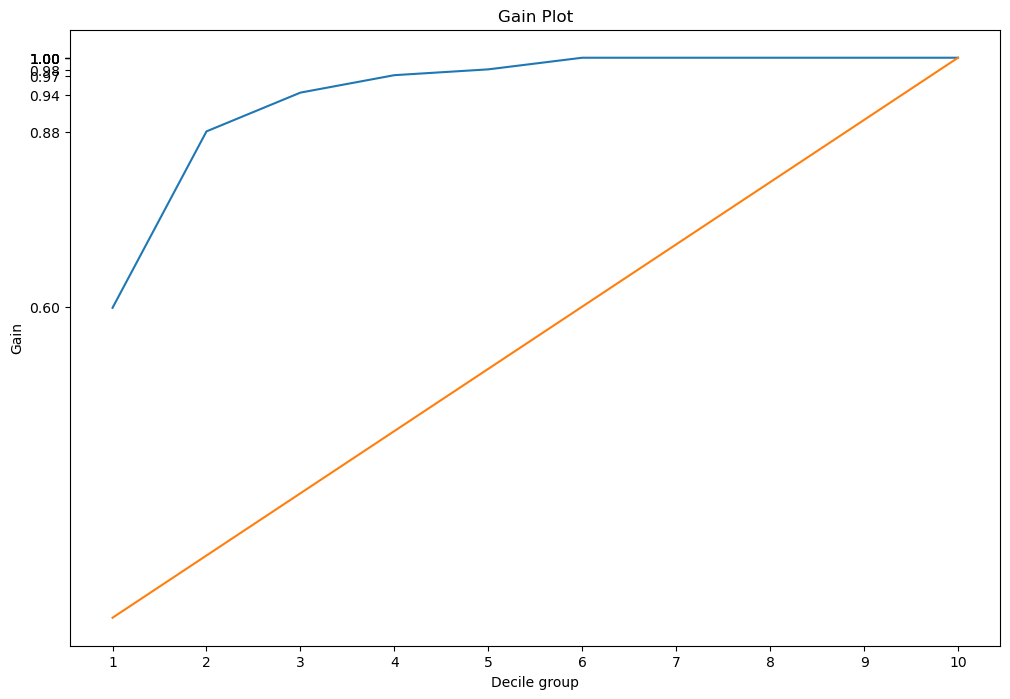

In [138]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(data = lift_gain_report, x=lift_gain_report['Decile group'], y = lift_gain_report['Gain'])
sns.lineplot(data = lift_gain_report, x = lift_gain_report['Decile group'], y=lift_gain_report['Random Selection'])
plt.title('Gain Plot')
plt.xticks(lift_gain_report['Decile group'])
plt.yticks(round(lift_gain_report['Gain'], 2))
plt.show()

## 5. Feature importance

### 5.1. Feature importance analysis

In [139]:
feat_imp = model.get_booster().get_score(importance_type = 'total_gain')

In [140]:
feat_imp

{'Dependent_count': 105.73988342285156,
 'Months_on_book': 1065.390625,
 'Total_Relationship_Count': 3420.440185546875,
 'Months_Inactive_12_mon': 1171.571044921875,
 'Contacts_Count_12_mon': 887.5003051757812,
 'Credit_Limit': 1129.0479736328125,
 'Total_Used_Bal': 5424.81640625,
 'Total_Amt_Chng_Q4_Q1': 1757.8743896484375,
 'Total_Trans_Ct': 8128.75,
 'Total_Ct_Chng_Q4_Q1': 3160.7021484375,
 'Gender_F': 280.7076110839844,
 'Education_Level_Doctorate': 2.838099956512451,
 'Education_Level_Graduate': 14.467881202697754,
 'Education_Level_High School': 2.87313175201416,
 'Education_Level_Post-Graduate': 8.497978210449219,
 'Education_Level_Uneducated': 4.276032447814941,
 'Education_Level_Unknown': 33.514862060546875,
 'Marital_Status_Married': 93.84333801269531,
 'Marital_Status_Single': 6.226629257202148,
 'Marital_Status_Unknown': 3.463266611099243,
 'Income_Category_$120K +': 6.807750225067139,
 'Income_Category_$40K - $60K': 13.606843948364258,
 'Income_Category_$60K - $80K': 44.32

In [141]:
feature_importance = pd.DataFrame()
feature_importance['Variable'] = feat_imp.keys()
feature_importance['Importance value'] = feat_imp.values()
feature_importance['% Importance value'] = feature_importance['Importance value'] / feature_importance['Importance value'].sum() * 100
feature_importance.sort_values(by = ['Importance value'], ascending = False)

,Variable,Importance value,% Importance value
8,Total_Trans_Ct,8128.750000,30.241879
6,Total_Used_Bal,5424.816406,20.182272
2,Total_Relationship_Count,3420.440186,12.725270
9,Total_Ct_Chng_Q4_Q1,3160.702148,11.758951
7,Total_Amt_Chng_Q4_Q1,1757.874390,6.539926
3,Months_Inactive_12_mon,1171.571045,4.358666
5,Credit_Limit,1129.047974,4.200465
1,Months_on_book,1065.390625,3.963637
4,Contacts_Count_12_mon,887.500305,3.301821
10,Gender_F,280.707611,1.044333


### 5.2 SHAP chart

In [142]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


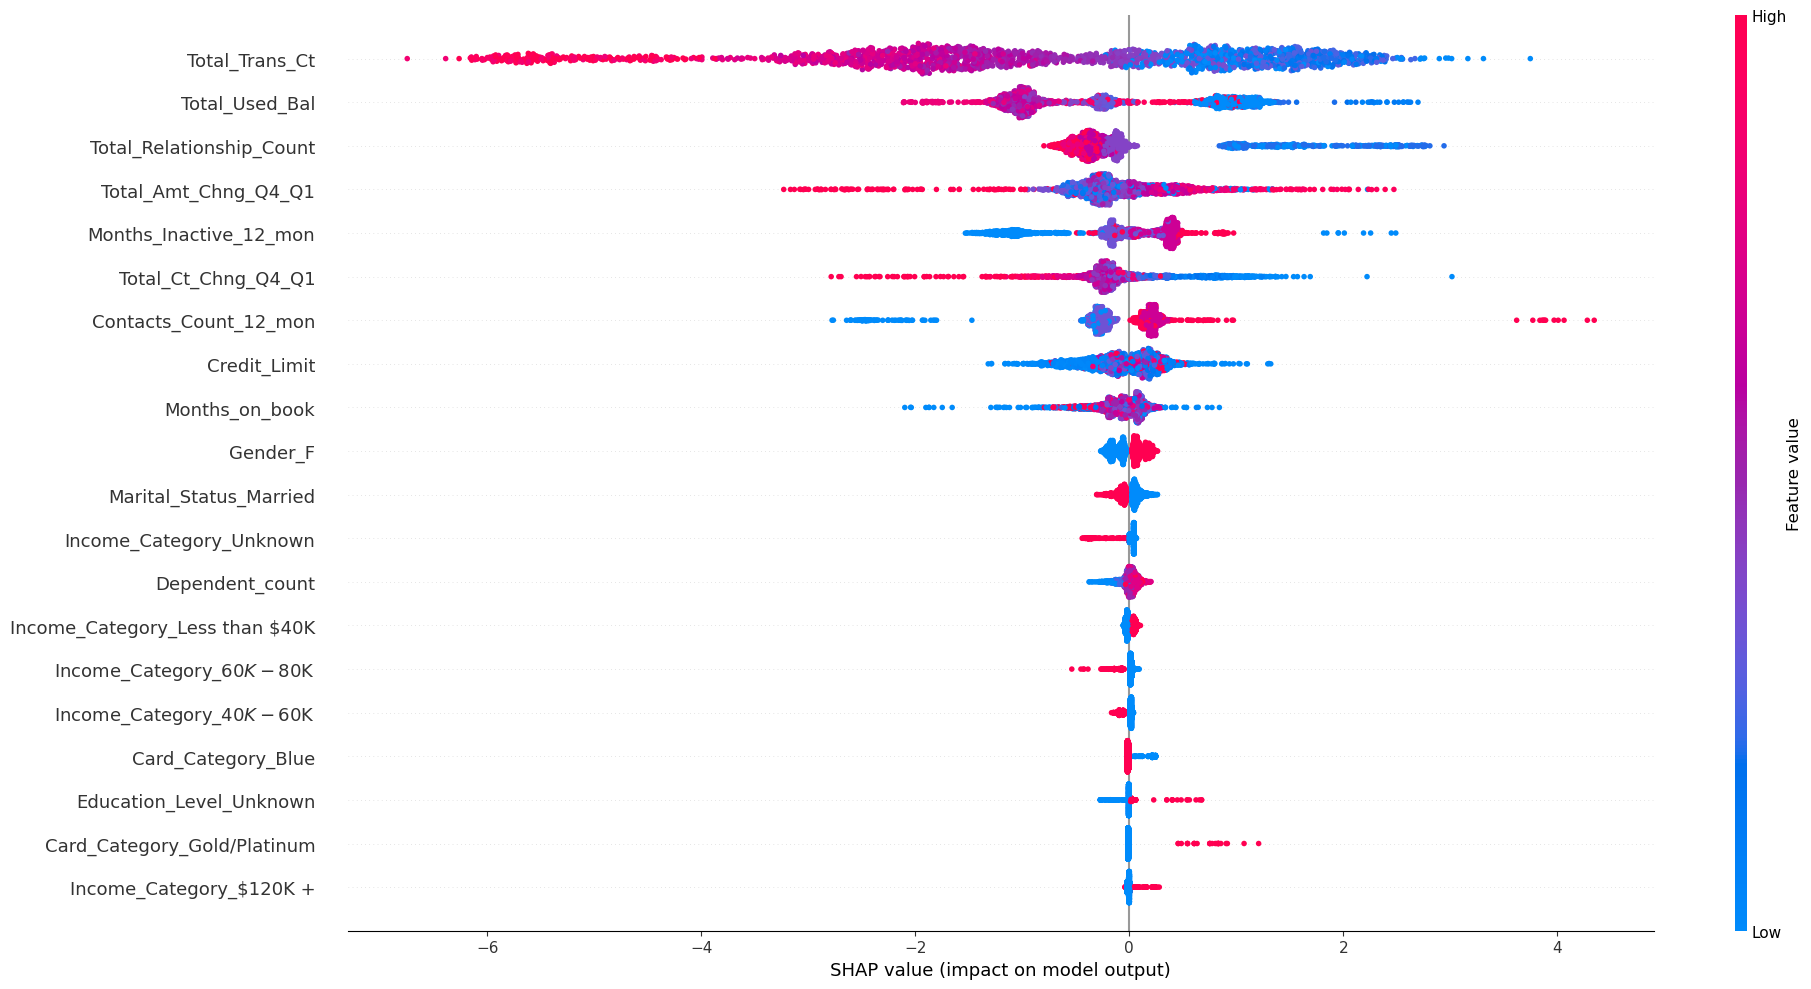

In [143]:
shap.summary_plot(shap_values, X_test, plot_size = (20,10))

INTERPRETATION: The variable which impacts most if a client is a churner or not, is Total_Trans_Ct, which represents the total number of payments made in last 12 months. When this variable takes low values (blue color), which means that the total number of payments made in last 12 months is low (so very few payments), the impact on the model output is positive, which in this case means that the model takes value 1, and 1 is the codification for being a churner here. So that is a bad thing for the bank. When Total_Trans_Ct feature takes high values (red), the model output is impacted negatively, which in this case takes value 0, which means a current client and that is the desired state of the bank's clients. The second variable which impacts the most the state of a client is Total_Used_Bal, which represents Total used amount from credit card limit. When Total_Used_Bal feature takes high values, that is when a client uses more money out of the available amount they have with the bank, they are more likely to remain a client, and when they use less of the amount they have, they are more likely to leave the bank.

SHAP 1 single observation

In [144]:
index = 123
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index], link = 'logit')

The client with index 123 has a 6% probability to be a churner. The aspects which impact the client the most to become more of a churner (raises the probability to be one) are Total_Used_Bal being 0 (the client didn't use any money from their account), Total_Trans_Ct being 35 (client made 35 payments in the last 12 months) and Months_Inactive_12_mon being 2 (client hasn't had payments in the last 2 months). The aspects with impact the client the most to keep being a client are Contacts_Count_12_mon being 0 (0 contacts/interactions with the bank in the last 12 months) and Total_Relationship_Count being 5 (Number of products in portfolio is 5). The aspects which make the client more likely to stay a client are way more relevant for the client than the aspects which make the client more probable to leave, and thats why the probability to become a churner is so low.

In [145]:
index = 50
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index], link = 'logit')

For the client with index 50, the probability to be a churner is 99%. The most important aspects which sway the client to be a churner are Contacts_Count_12_mon being 6, Total_Relationship_Count being 2 and Total_Trans_Ct being 46 which far outway the feature which influences the client to stay with the bank, which is Total_Used_Bal being 2174

In [146]:
pr = pd.DataFrame()
pr['proba'] = y_predict_proba_class_1

In [147]:
pr[pr['proba'] == pr['proba'].max()]

,proba
346,0.999228


In [148]:
index = 346
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index], link = 'logit')

The client with index 346 is the client with the maximum probability to be a churner, which being 1.00 ss a certain. The client is a churner, mainly because of the following aspects: Total_Relationship_Count = 1, Total_Trnas_Ct = 51, Total_Used_Bal = 132.